In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\sneha\Downloads\COE_PROJ\Data\data.csv")

In [3]:
#check size
df.shape

(20000, 27)

In [4]:
# Check basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Util

In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_Savings_Mis

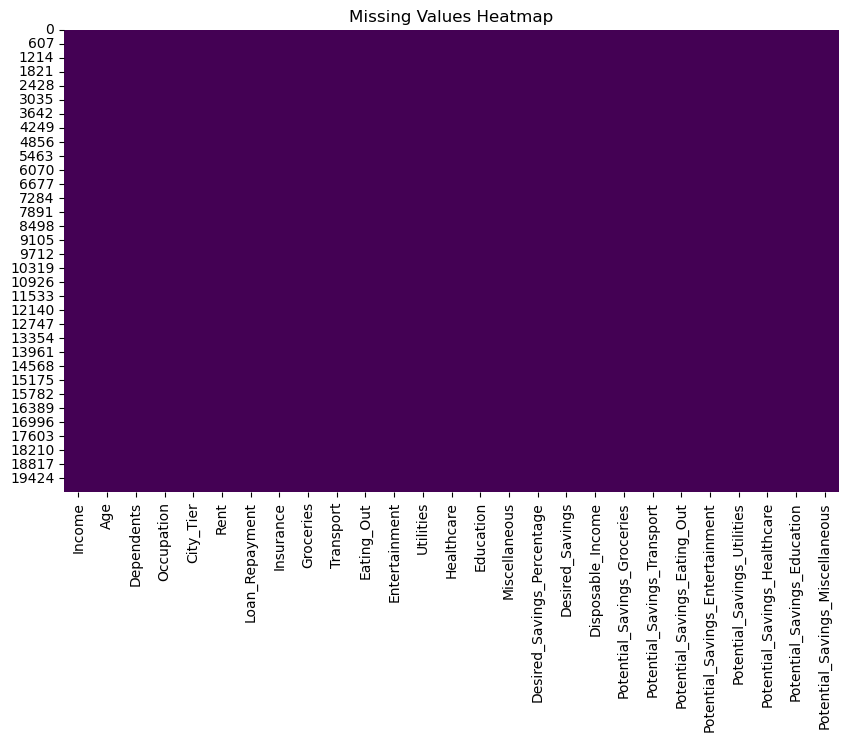

In [6]:
# Visualize missing values (optional, if using libraries like seaborn)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [7]:
df.dtypes

Income                             float64
Age                                  int64
Dependents                           int64
Occupation                          object
City_Tier                           object
Rent                               float64
Loan_Repayment                     float64
Insurance                          float64
Groceries                          float64
Transport                          float64
Eating_Out                         float64
Entertainment                      float64
Utilities                          float64
Healthcare                         float64
Education                          float64
Miscellaneous                      float64
Desired_Savings_Percentage         float64
Desired_Savings                    float64
Disposable_Income                  float64
Potential_Savings_Groceries        float64
Potential_Savings_Transport        float64
Potential_Savings_Eating_Out       float64
Potential_Savings_Entertainment    float64
Potential_S

In [8]:
# Check for duplicate rows
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicates
df = df.drop_duplicates()
print(f"Data shape after removing duplicates: {df.shape}")

Number of duplicate rows: 0
Data shape after removing duplicates: (20000, 27)


In [9]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Apply the function to numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
outliers_count = {}
for col in num_cols:
    outliers_count[col] = detect_outliers_iqr(df, col)

# Print the number of outliers in each column
print("Outliers Count Per Column:")
print(outliers_count)

Outliers Count Per Column:
{'Income': 1254, 'Age': 0, 'Dependents': 0, 'Rent': 1320, 'Loan_Repayment': 1880, 'Insurance': 1375, 'Groceries': 1227, 'Transport': 1261, 'Eating_Out': 1325, 'Entertainment': 1324, 'Utilities': 1291, 'Healthcare': 1294, 'Education': 1159, 'Miscellaneous': 1348, 'Desired_Savings_Percentage': 789, 'Desired_Savings': 1303, 'Disposable_Income': 1331, 'Potential_Savings_Groceries': 1401, 'Potential_Savings_Transport': 1395, 'Potential_Savings_Eating_Out': 1431, 'Potential_Savings_Entertainment': 1453, 'Potential_Savings_Utilities': 1383, 'Potential_Savings_Healthcare': 1417, 'Potential_Savings_Education': 1347, 'Potential_Savings_Miscellaneous': 1471}


In [10]:
# Create a copy of the original dataset for comparison
df_original = df.copy()

In [11]:
import numpy as np

# Function to cap outliers with custom bounds
def cap_outliers(df, columns, custom_bounds=None):
    for col in columns:
        if custom_bounds and col in custom_bounds:
            lower_bound = custom_bounds[col]['lower']
            upper_bound = custom_bounds[col]['upper']
            df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

# Define realistic custom bounds for financial variability
custom_bounds = {
    'Income': {'lower': 500, 'upper': 500000},  # Logical minimum and maximum for incomes
    'Age': {'lower': 18, 'upper': 90},  # Reasonable working-age range
    'Dependents': {'lower': 0, 'upper': 10},  # Logical number of dependents
    'Rent': {'lower': 0, 'upper': 0.5 * df['Income'].max()},  # Rent capped at 50% of income
    'Loan_Repayment': {'lower': 0, 'upper': 0.4 * df['Income'].max()},  # Repayment up to 40% of income
    'Insurance': {'lower': 0, 'upper': 0.2 * df['Income'].max()},  # Insurance capped at 20% of income
    'Groceries': {'lower': 0, 'upper': 0.3 * df['Income'].max()},  # Groceries up to 30% of income
    'Transport': {'lower': 0, 'upper': 0.2 * df['Income'].max()},  # Transport capped at 20% of income
    'Eating_Out': {'lower': 0, 'upper': 0.15 * df['Income'].max()},  # Eating out capped at 15% of income
    'Entertainment': {'lower': 0, 'upper': 0.2 * df['Income'].max()},  # Entertainment capped at 20% of income
    'Utilities': {'lower': 0, 'upper': 0.15 * df['Income'].max()},  # Utilities up to 15% of income
    'Healthcare': {'lower': 0, 'upper': 0.3 * df['Income'].max()},  # Healthcare up to 30% of income
    'Education': {'lower': 0, 'upper': 0.3 * df['Income'].max()},  # Education up to 30% of income
    'Miscellaneous': {'lower': 0, 'upper': 0.2 * df['Income'].max()},  # Miscellaneous up to 20% of income
    'Desired_Savings_Percentage': {'lower': 0, 'upper': 50},  # Savings percentage capped at 50%
    'Desired_Savings': {'lower': 0, 'upper': 0.5 * df['Income'].max()},  # Desired savings up to 50% of income
    'Disposable_Income': {'lower': 0, 'upper': df['Income'].max()},  # Disposable income capped at total income
    'Potential_Savings_Groceries': {'lower': 0, 'upper': 0.3 * df['Groceries'].max()},
    'Potential_Savings_Transport': {'lower': 0, 'upper': 0.3 * df['Transport'].max()},
    'Potential_Savings_Eating_Out': {'lower': 0, 'upper': 0.3 * df['Eating_Out'].max()},
    'Potential_Savings_Entertainment': {'lower': 0, 'upper': 0.3 * df['Entertainment'].max()},
    'Potential_Savings_Utilities': {'lower': 0, 'upper': 0.3 * df['Utilities'].max()},
    'Potential_Savings_Healthcare': {'lower': 0, 'upper': 0.3 * df['Healthcare'].max()},
    'Potential_Savings_Education': {'lower': 0, 'upper': 0.3 * df['Education'].max()},
    'Potential_Savings_Miscellaneous': {'lower': 0, 'upper': 0.3 * df['Miscellaneous'].max()},
}

# Select numeric columns to apply bounds
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Apply outlier capping with custom bounds
df_cleaned = cap_outliers(df, num_cols, custom_bounds)

# Review statistics for capped dataset
print("Outlier handling applied. Review capped dataset statistics:")
print(df_cleaned.describe())

Outlier handling applied. Review capped dataset statistics:
              Income           Age    Dependents           Rent  \
count   20000.000000  20000.000000  20000.000000   20000.000000   
mean    41528.723861     41.031450      1.995950    9115.494629   
std     39079.122666     13.578725      1.417616    9254.228188   
min      1301.187333     18.000000      0.000000     235.365692   
25%     17604.875957     29.000000      1.000000    3649.422246   
50%     30185.383480     41.000000      2.000000    6402.751824   
75%     51765.446460     53.000000      3.000000   11263.940492   
max    500000.000000     64.000000      4.000000  215945.674703   

       Loan_Repayment     Insurance      Groceries     Transport  \
count    20000.000000  20000.000000   20000.000000  20000.000000   
mean      2049.800292   1455.028761    5205.667493   2704.466685   
std       4281.789941   1492.938435    5035.953689   2666.345648   
min          0.000000     30.002012     154.078240     81.228584

In [12]:
def count_remaining_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    return outliers_count

# Apply the function to numerical columns
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
remaining_outliers = count_remaining_outliers(df_cleaned, num_cols)

# Print the count of remaining outliers for each column
print("Remaining Outliers Count After Handling:")
print(remaining_outliers)

Remaining Outliers Count After Handling:
{'Income': 1254, 'Age': 0, 'Dependents': 0, 'Rent': 1320, 'Loan_Repayment': 1880, 'Insurance': 1375, 'Groceries': 1227, 'Transport': 1261, 'Eating_Out': 1325, 'Entertainment': 1324, 'Utilities': 1291, 'Healthcare': 1294, 'Education': 1159, 'Miscellaneous': 1348, 'Desired_Savings_Percentage': 789, 'Desired_Savings': 1303, 'Disposable_Income': 1331, 'Potential_Savings_Groceries': 1401, 'Potential_Savings_Transport': 1395, 'Potential_Savings_Eating_Out': 1431, 'Potential_Savings_Entertainment': 1453, 'Potential_Savings_Utilities': 1383, 'Potential_Savings_Healthcare': 1417, 'Potential_Savings_Education': 1347, 'Potential_Savings_Miscellaneous': 1471}


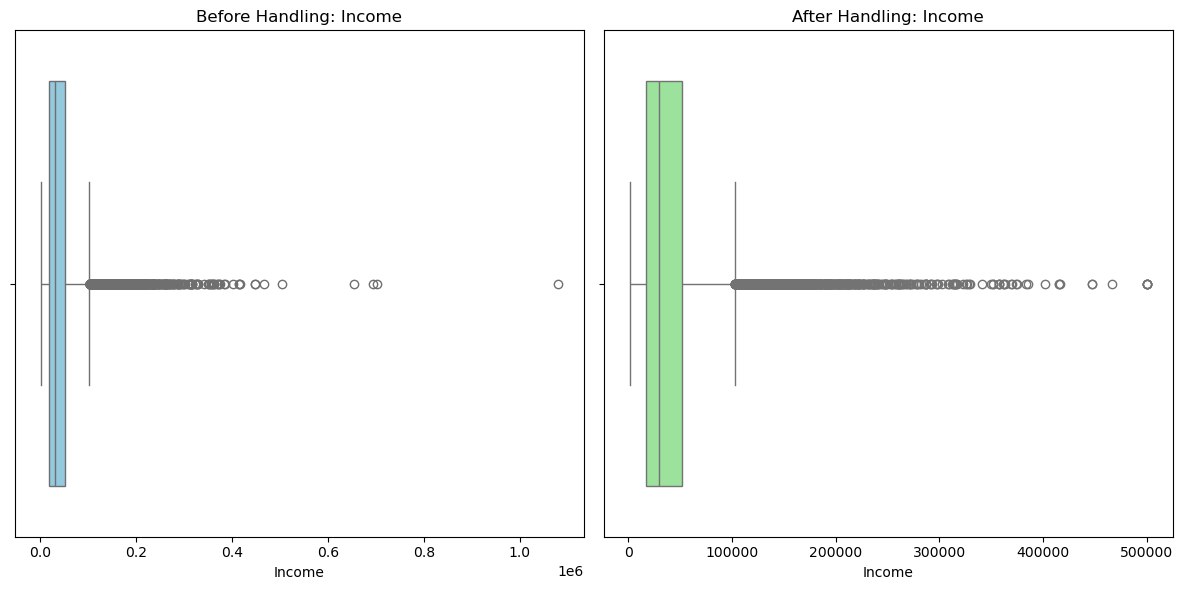

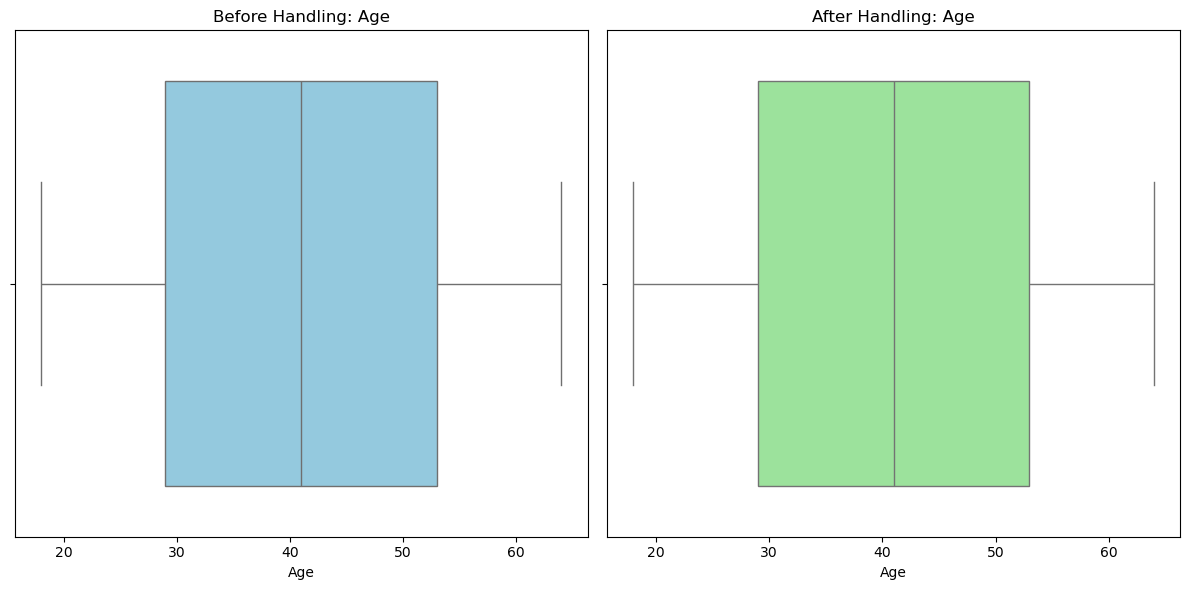

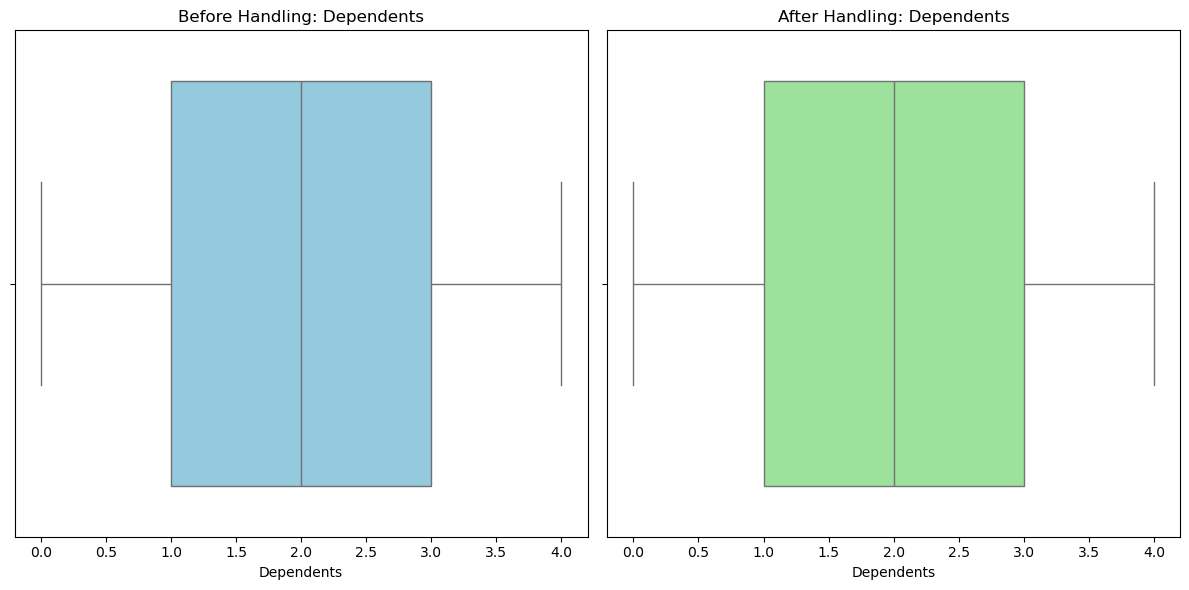

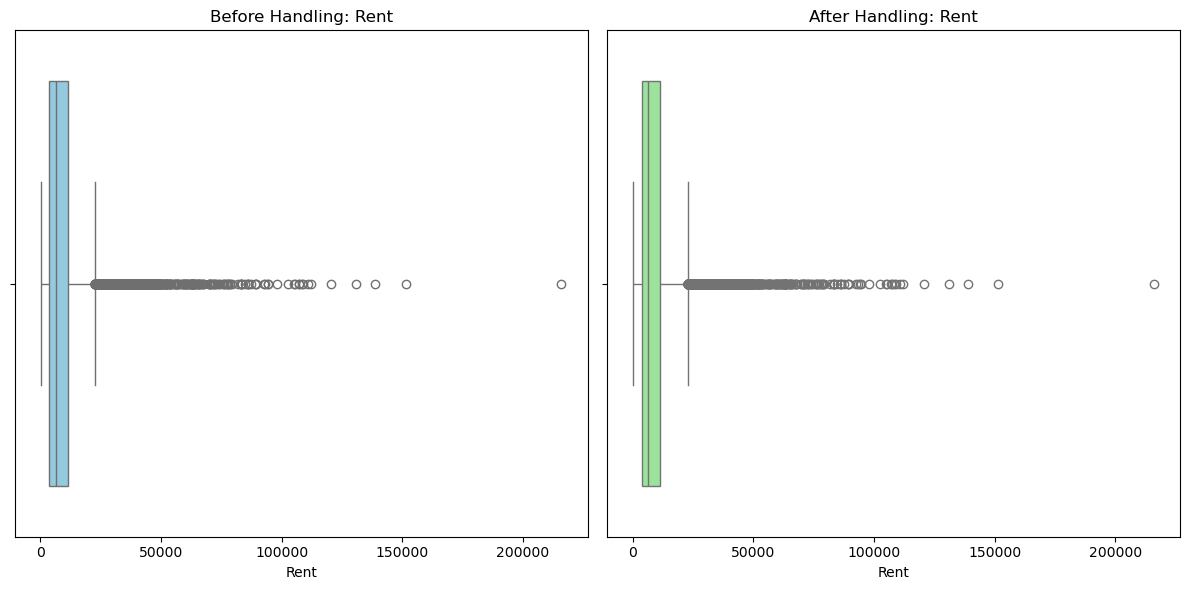

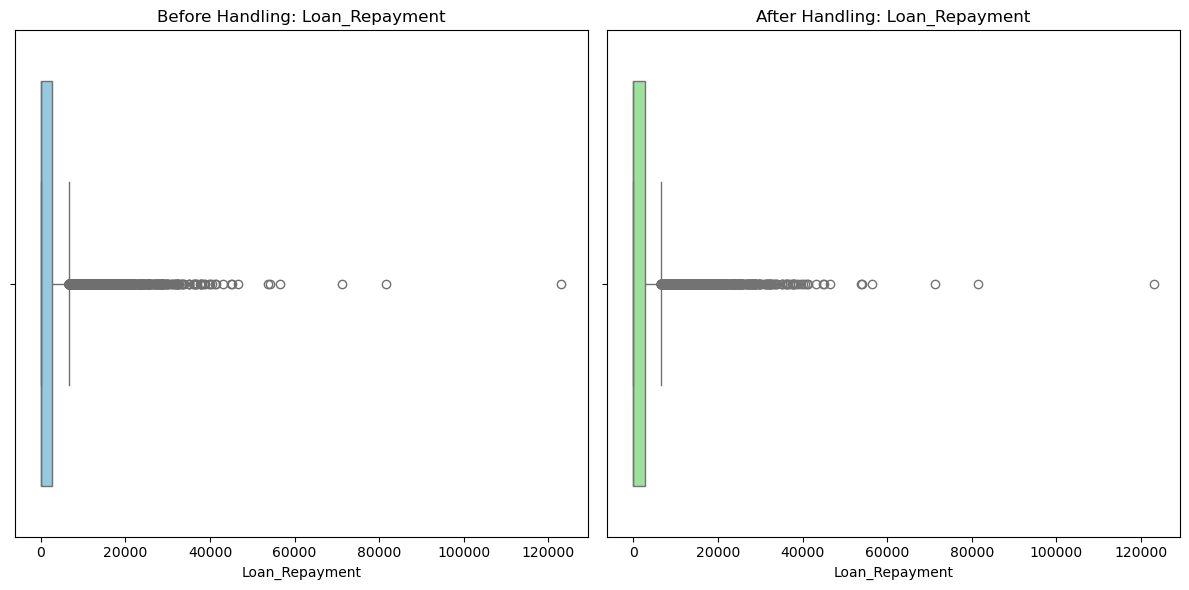

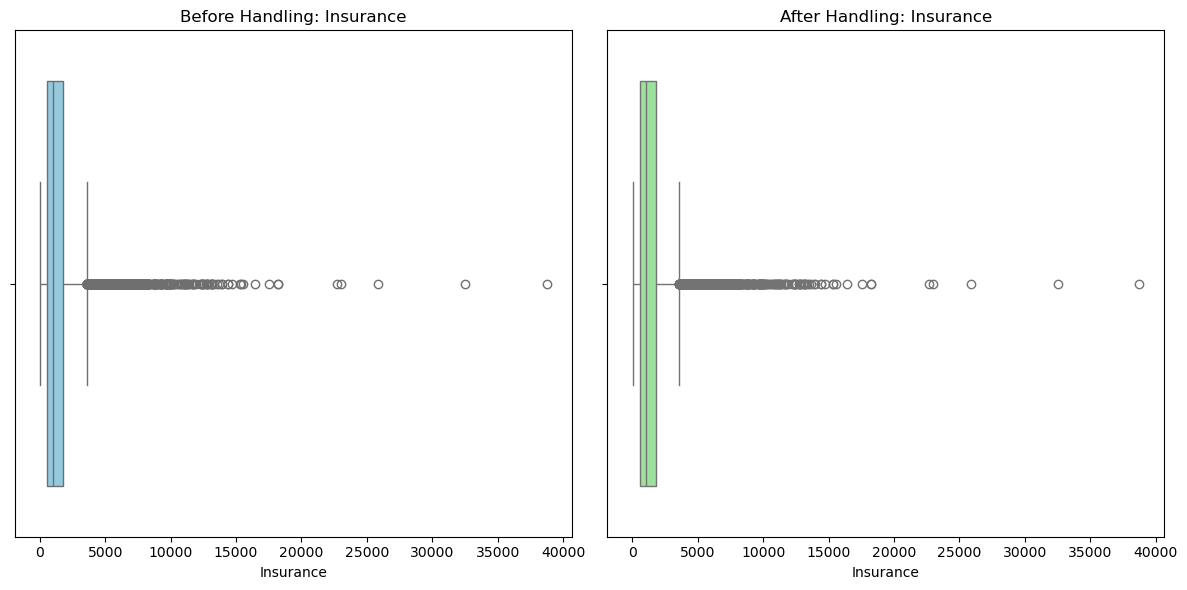

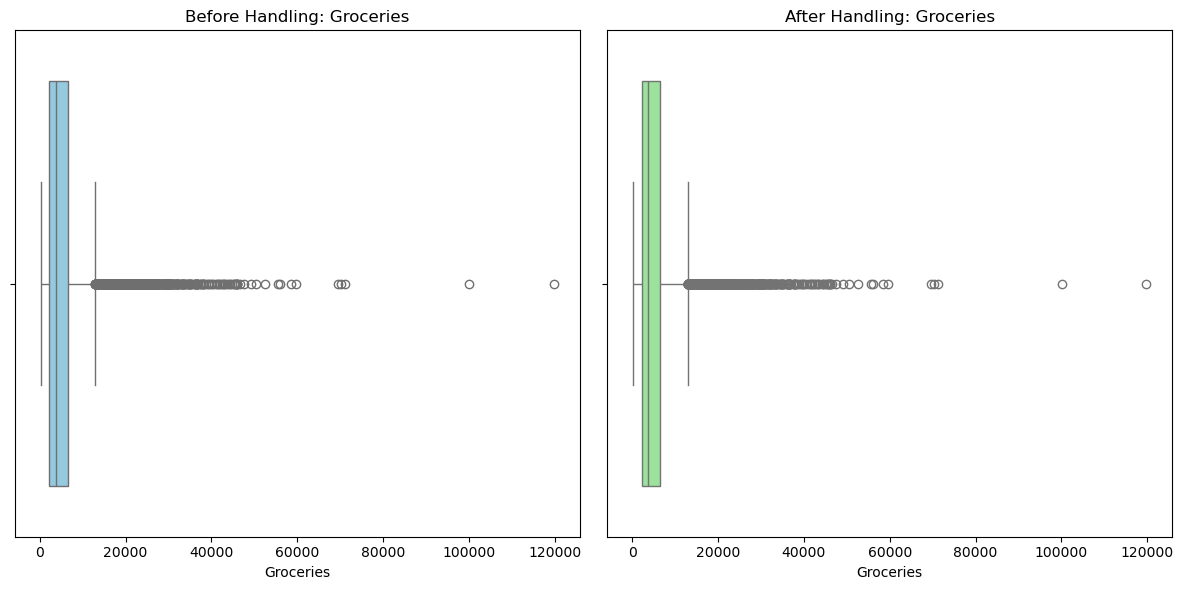

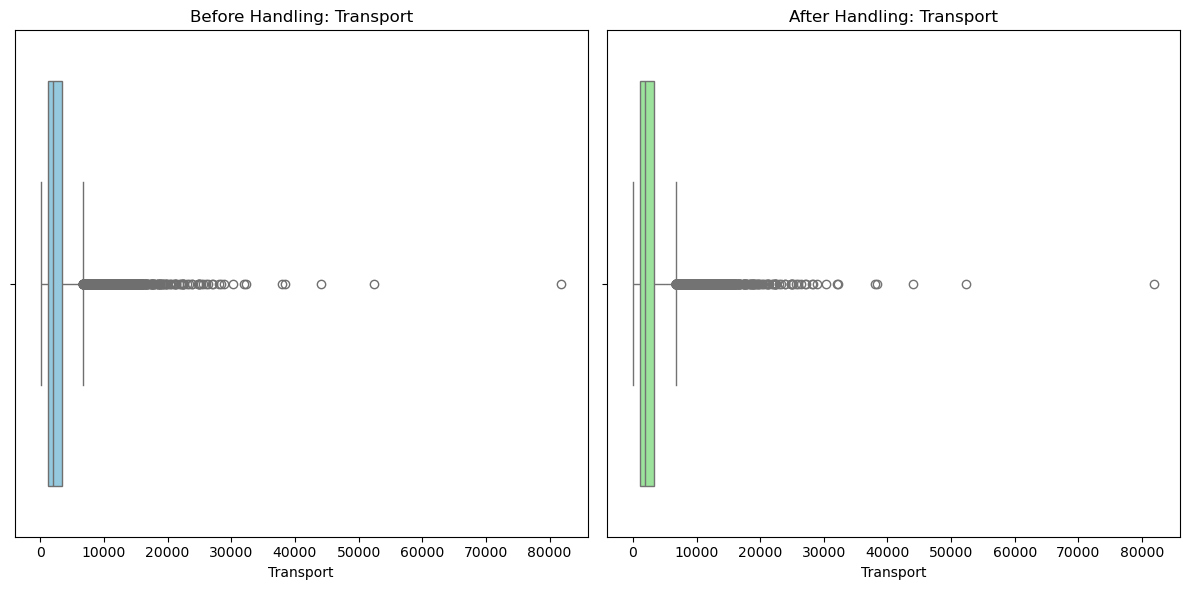

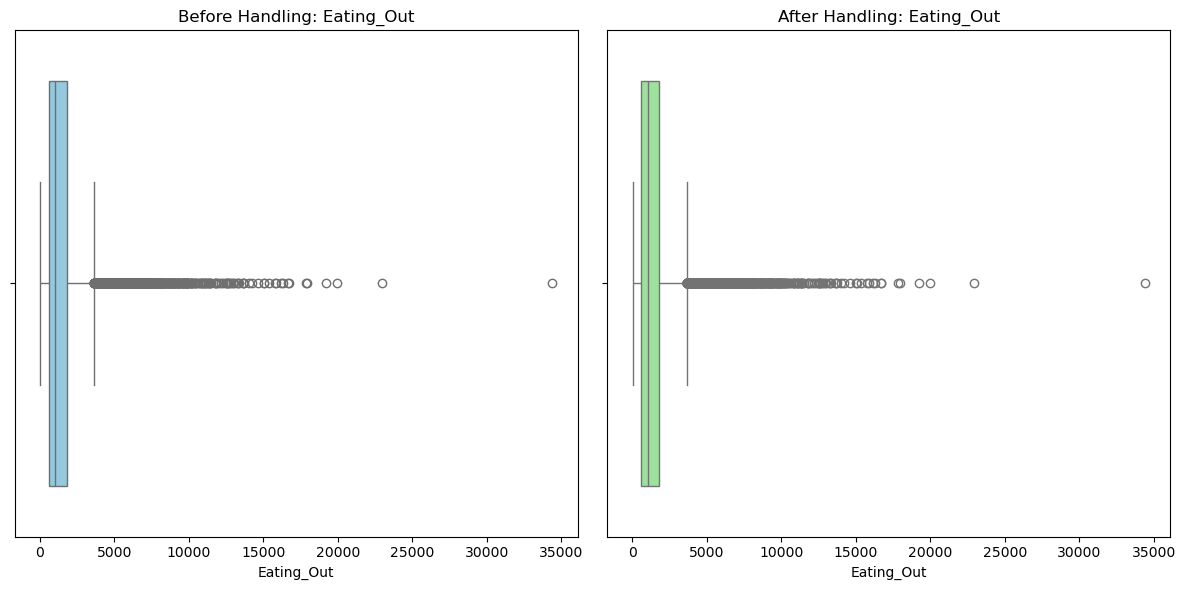

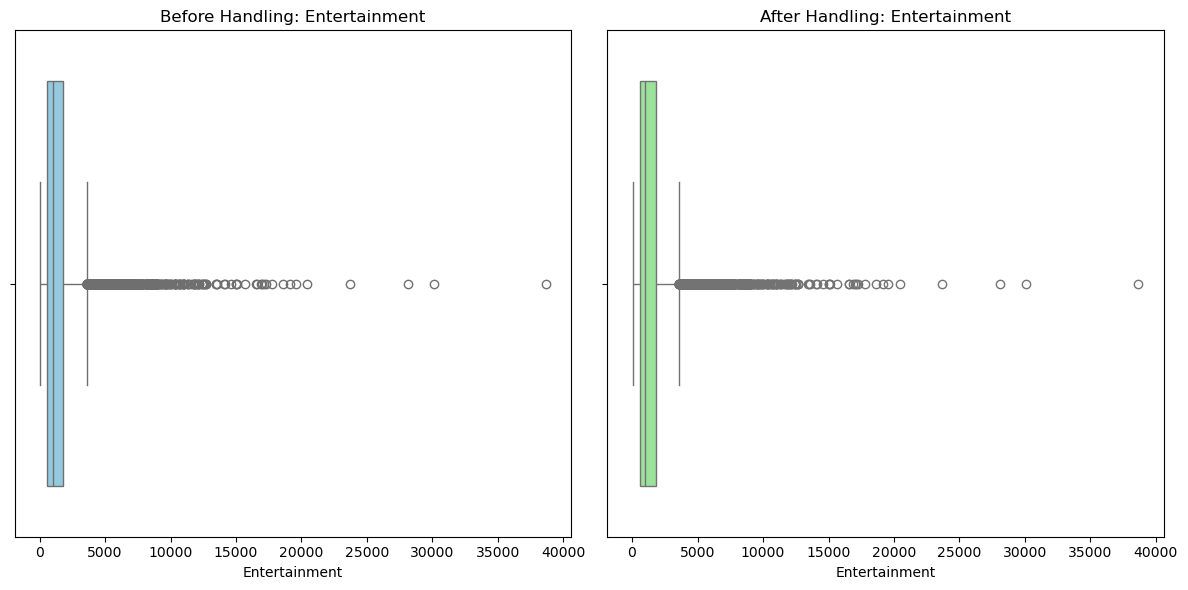

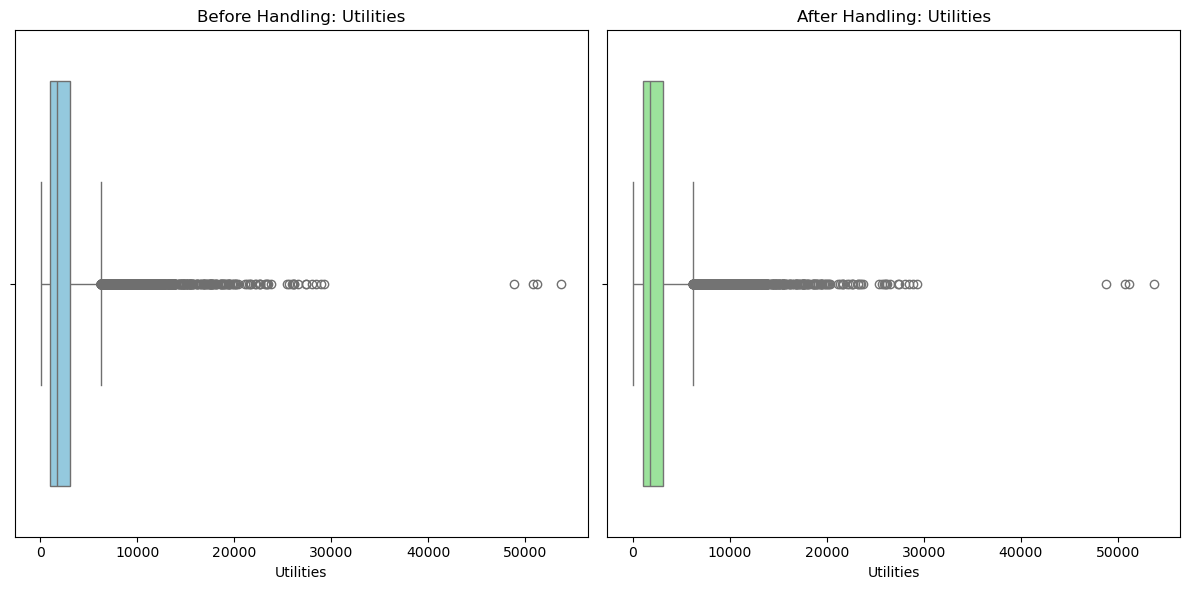

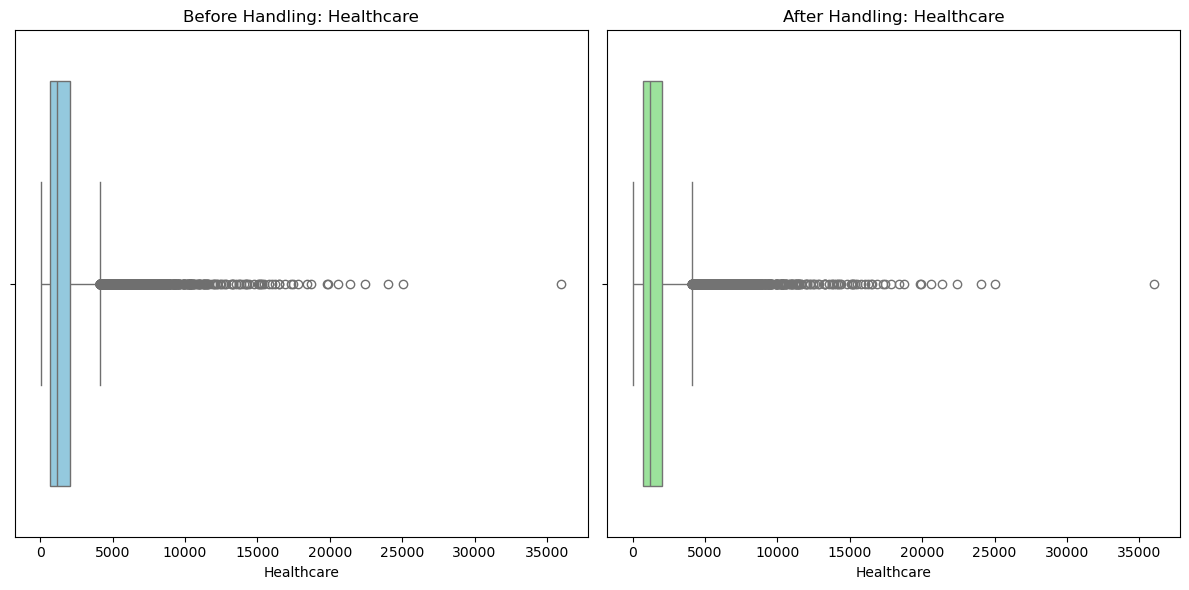

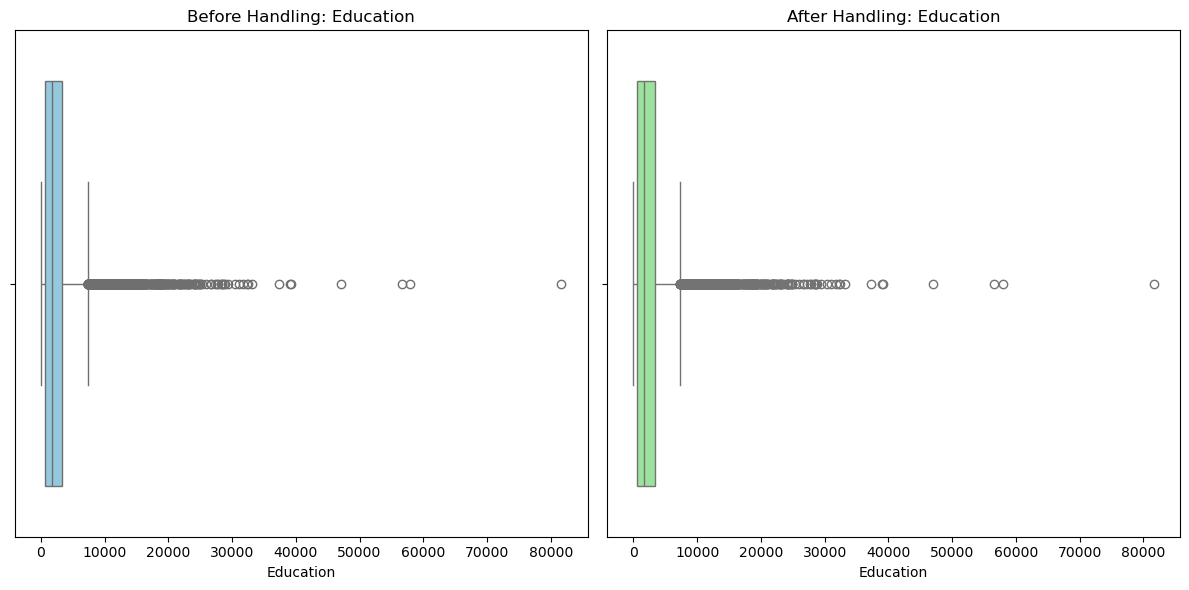

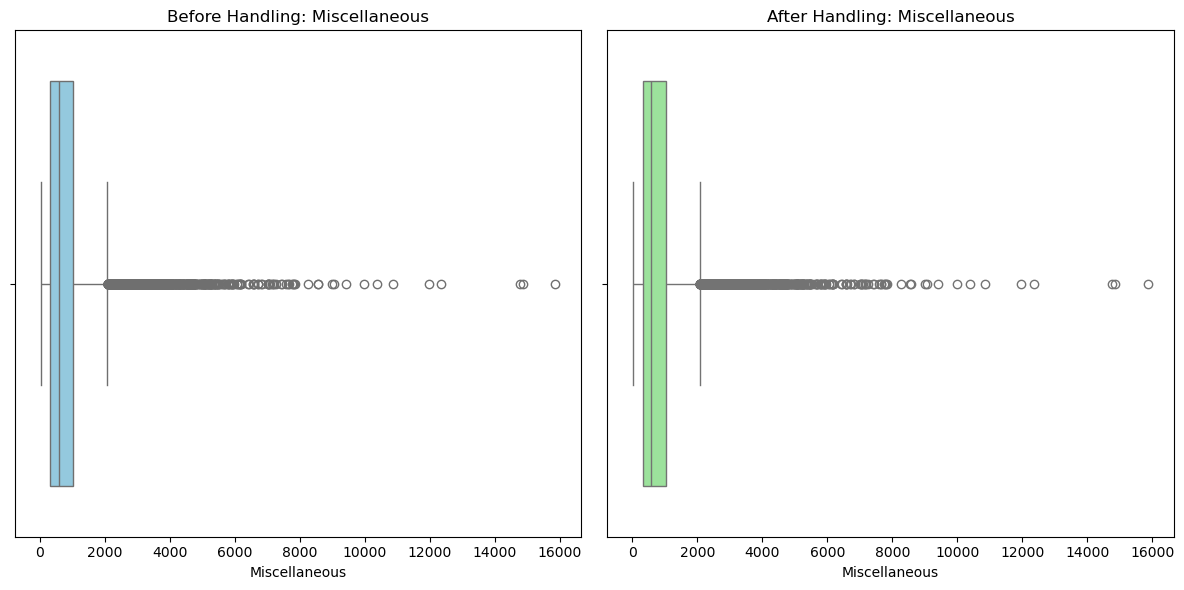

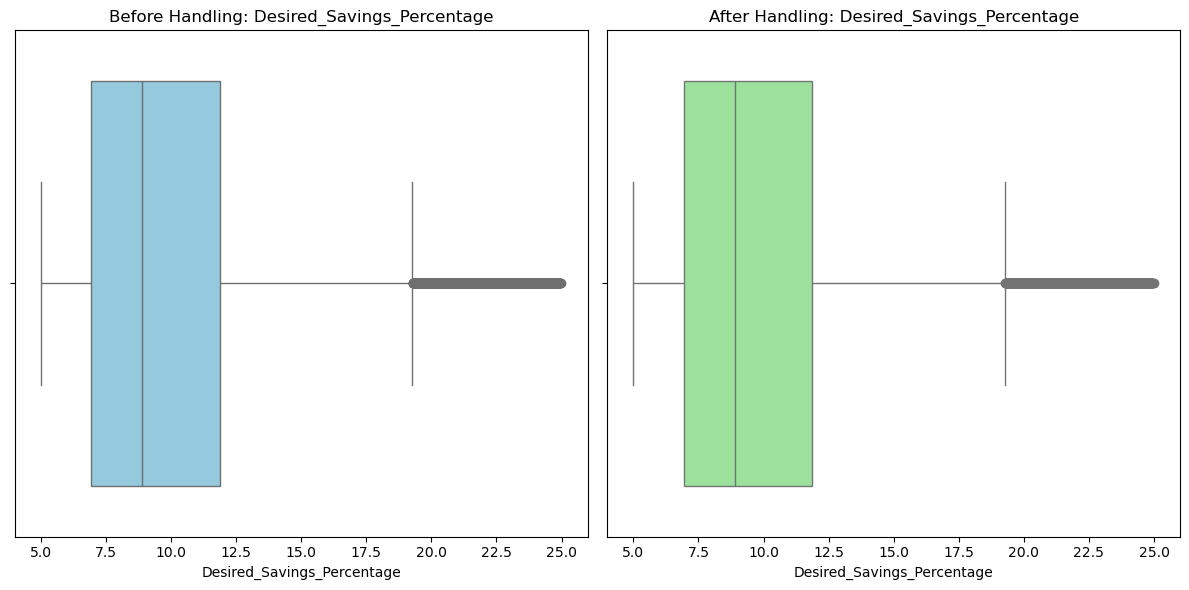

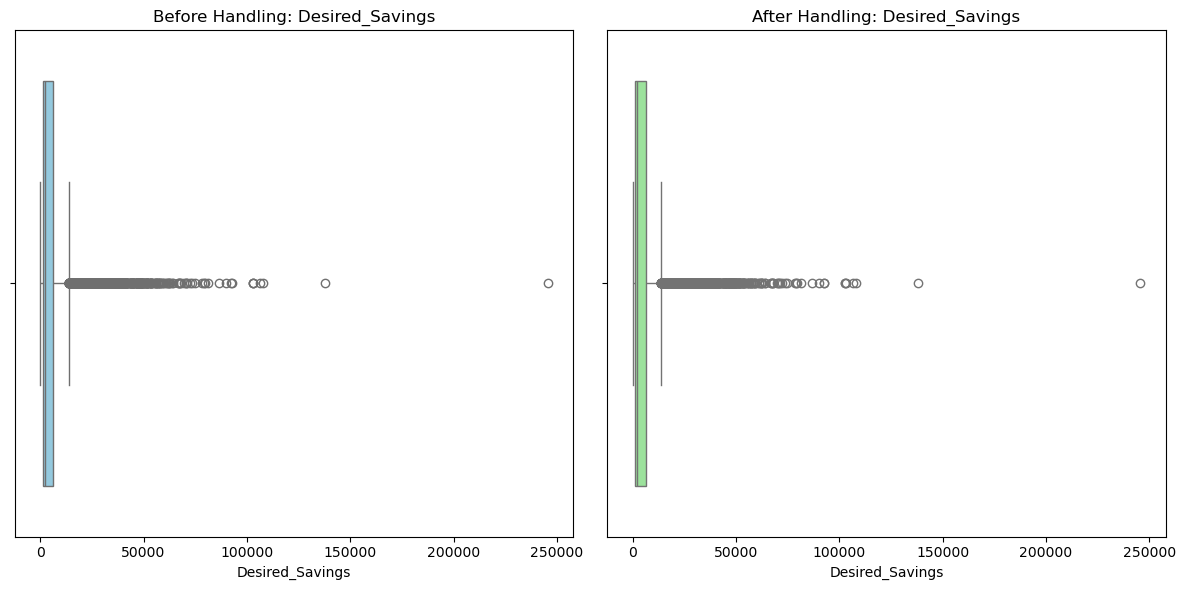

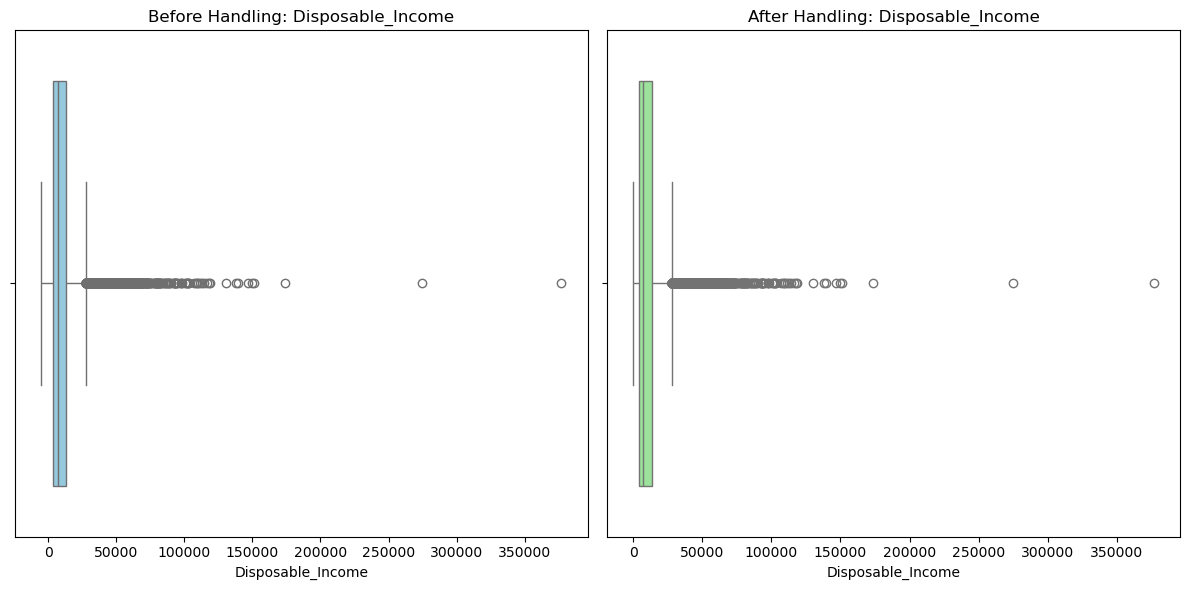

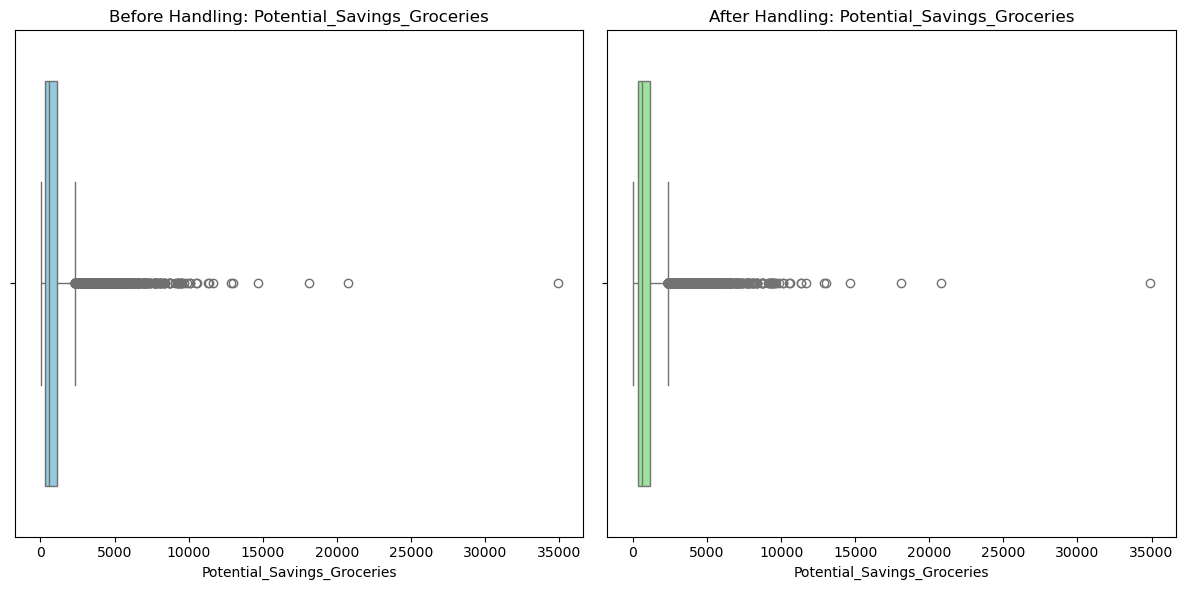

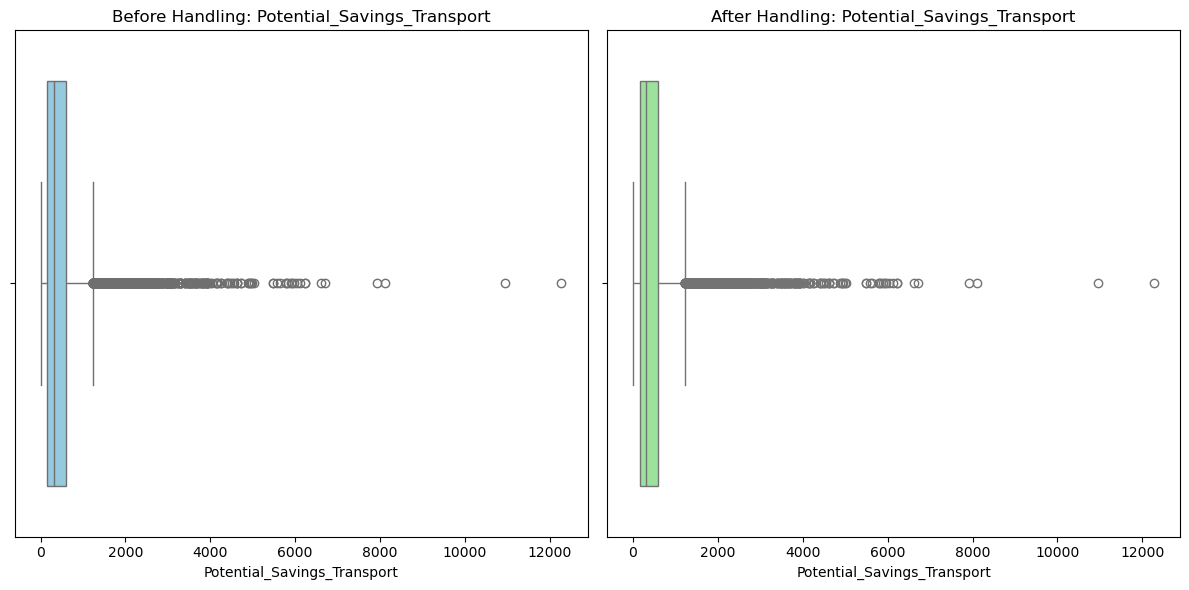

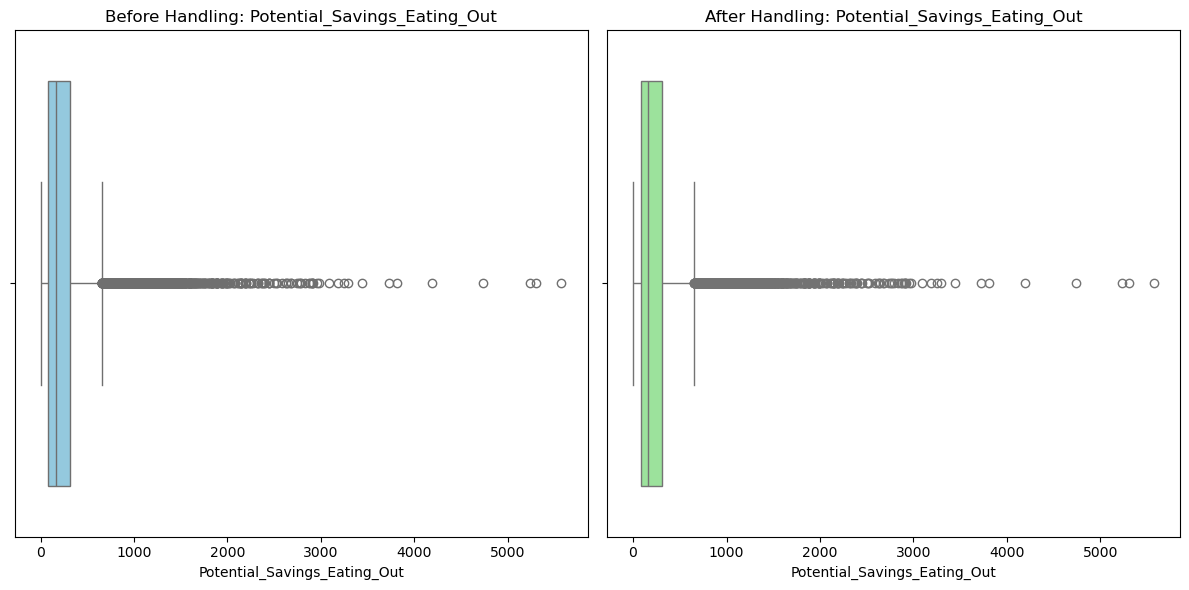

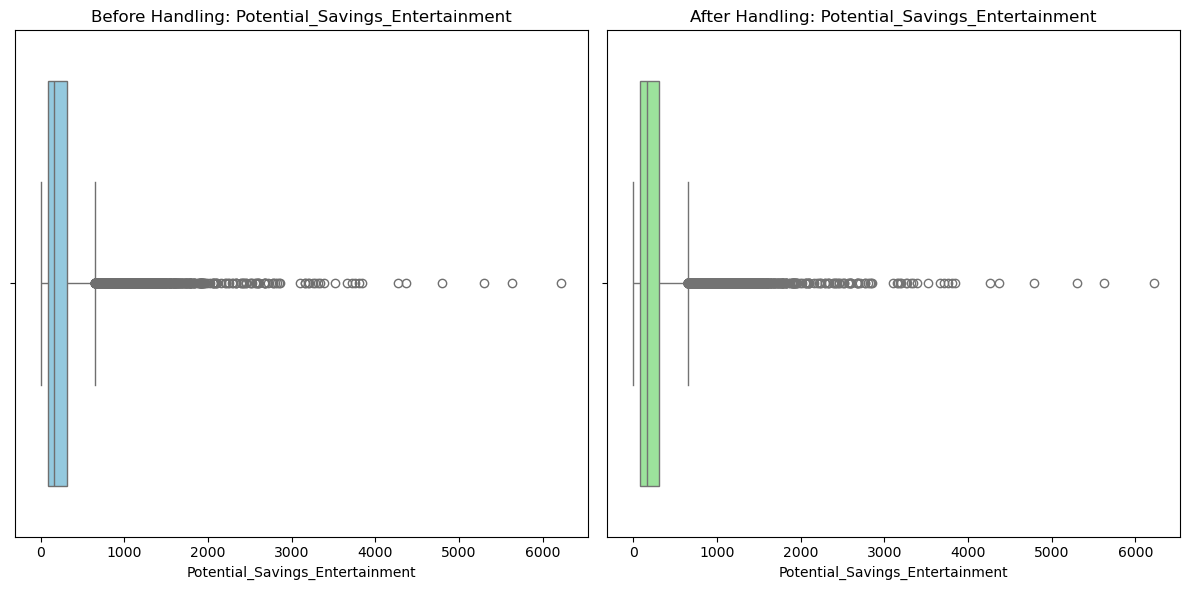

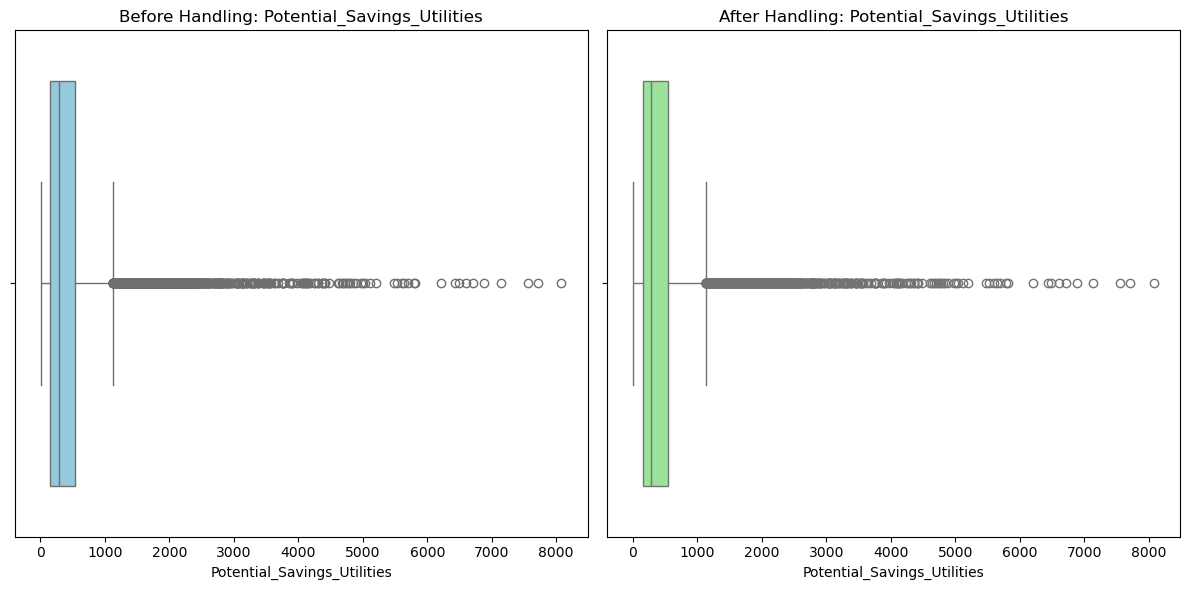

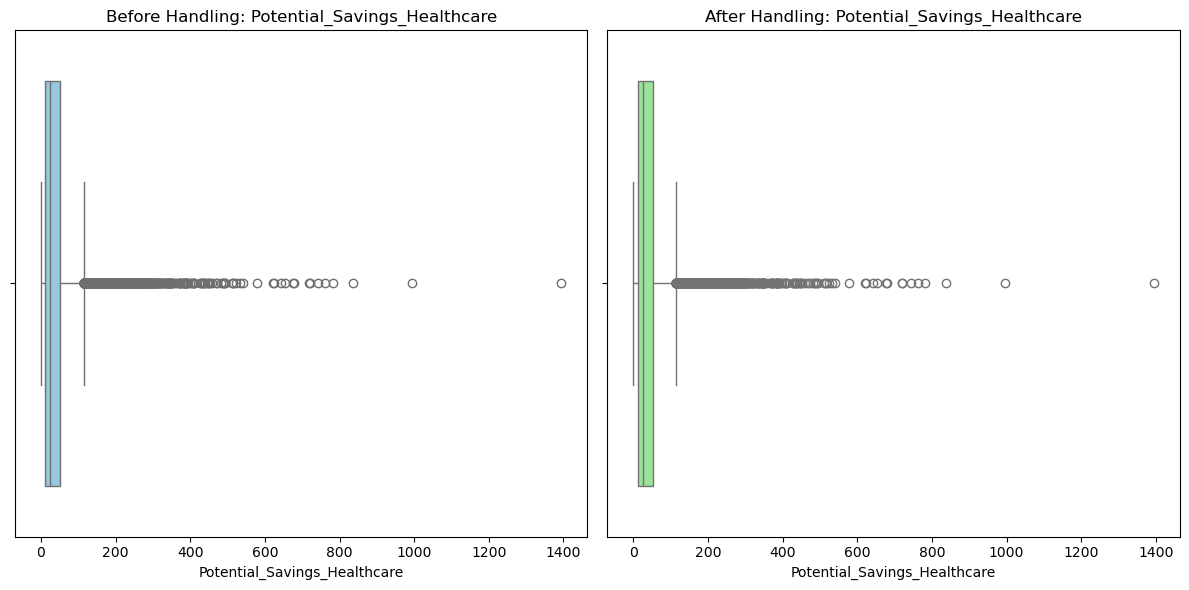

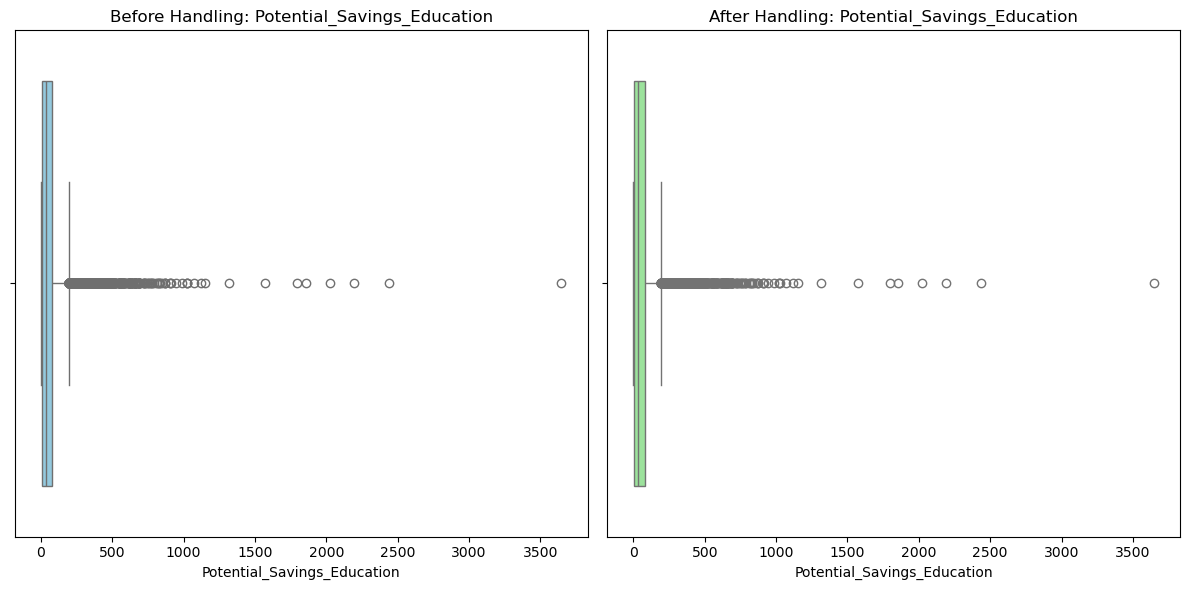

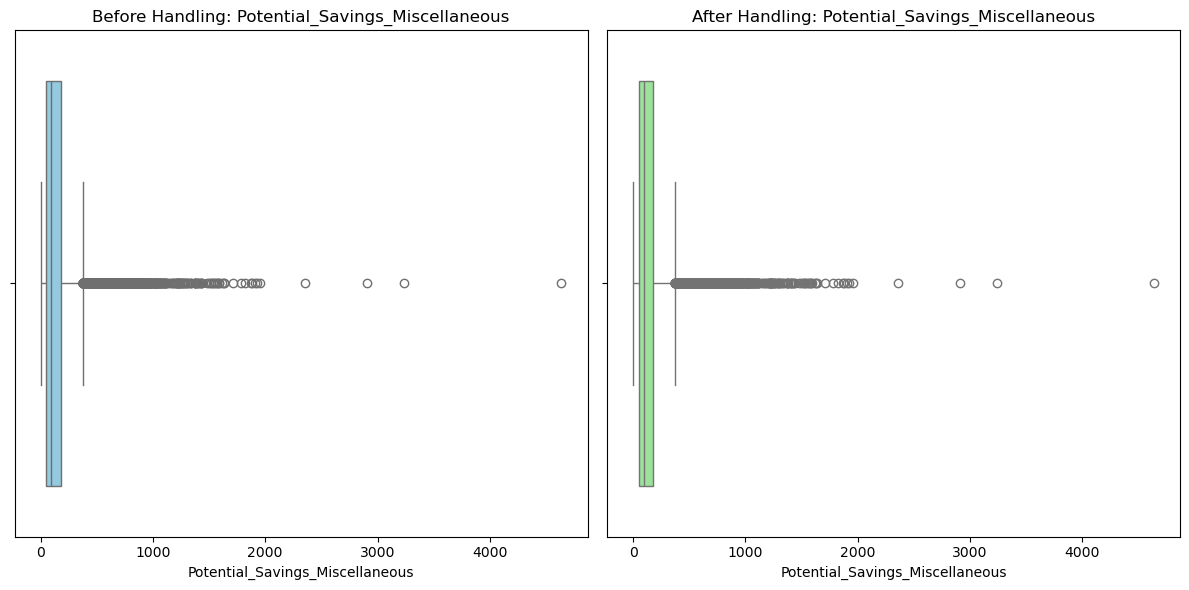

In [13]:
# Numerical columns in the dataset
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots for before and after handling
for col in num_cols:
    plt.figure(figsize=(12, 6))

    # Before handling
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df_original, x=col, color="skyblue")
    plt.title(f"Before Handling: {col}")

    # After handling
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_cleaned, x=col, color="lightgreen")
    plt.title(f"After Handling: {col}")

    plt.tight_layout()
    plt.show()

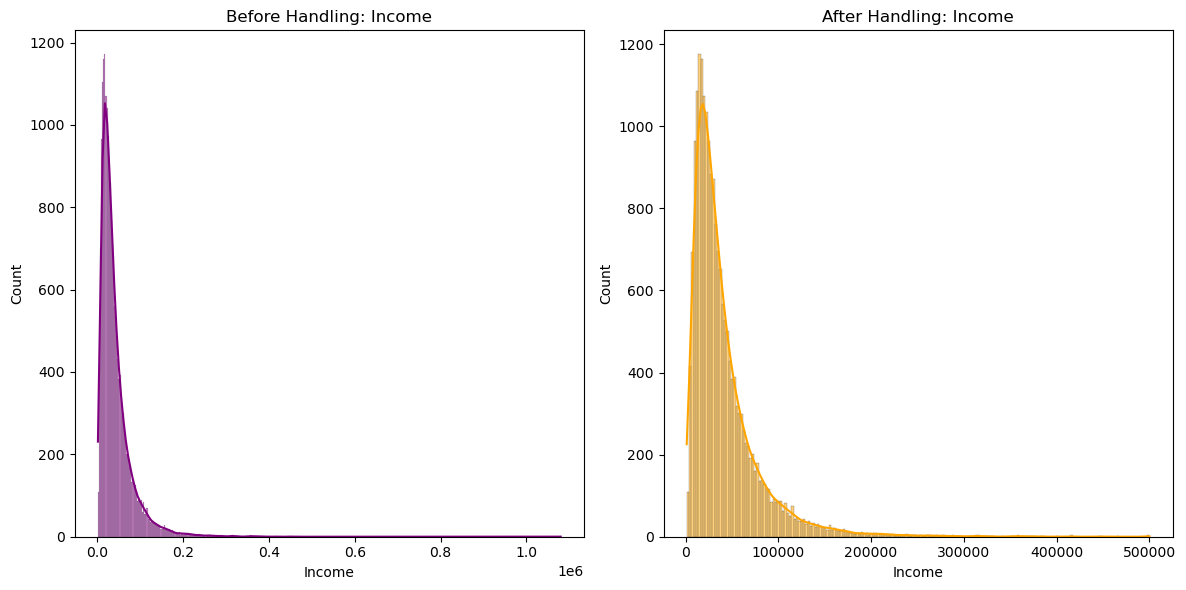

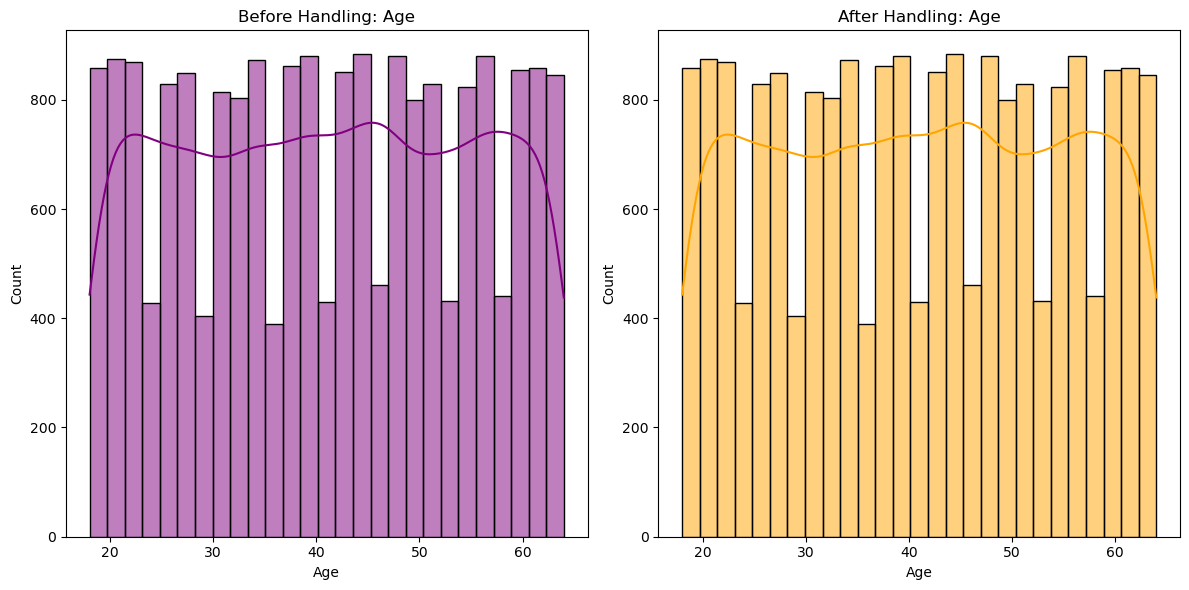

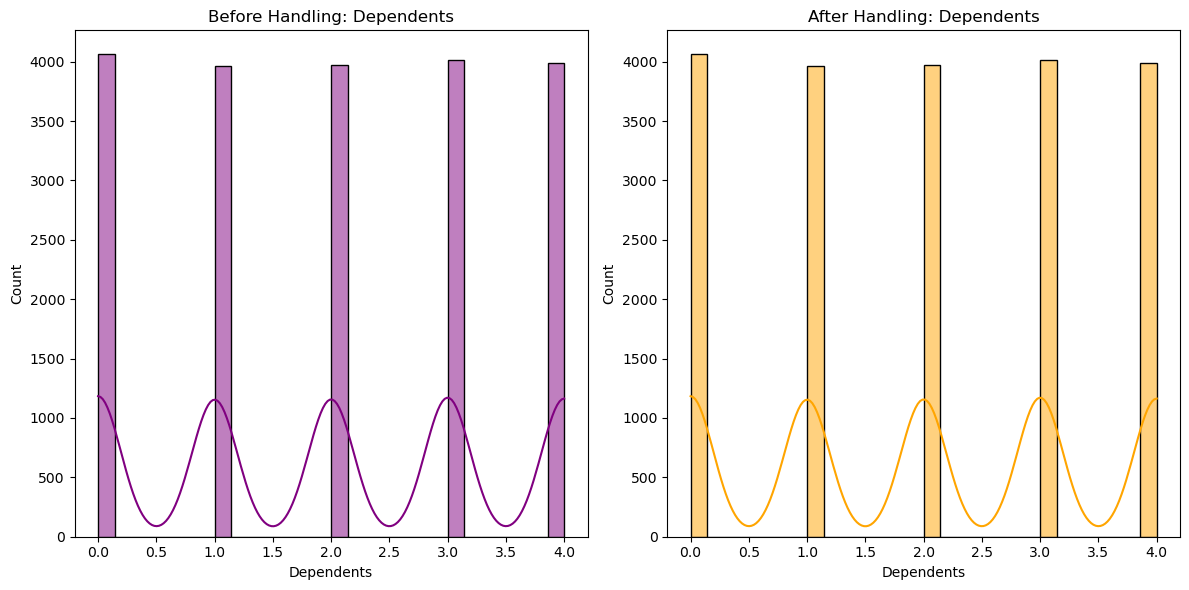

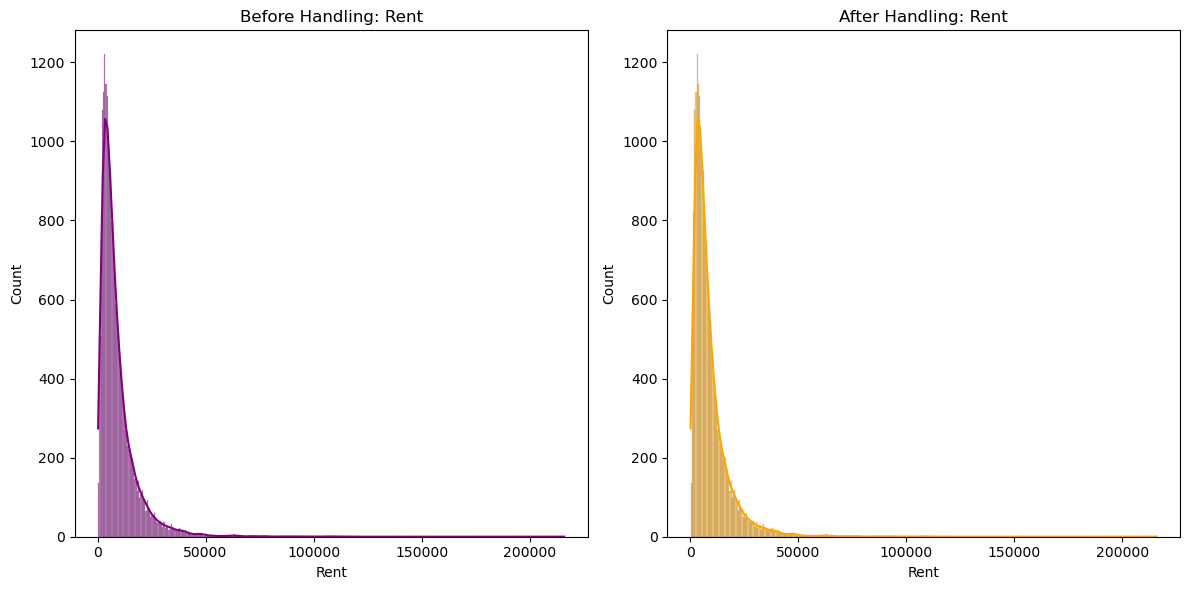

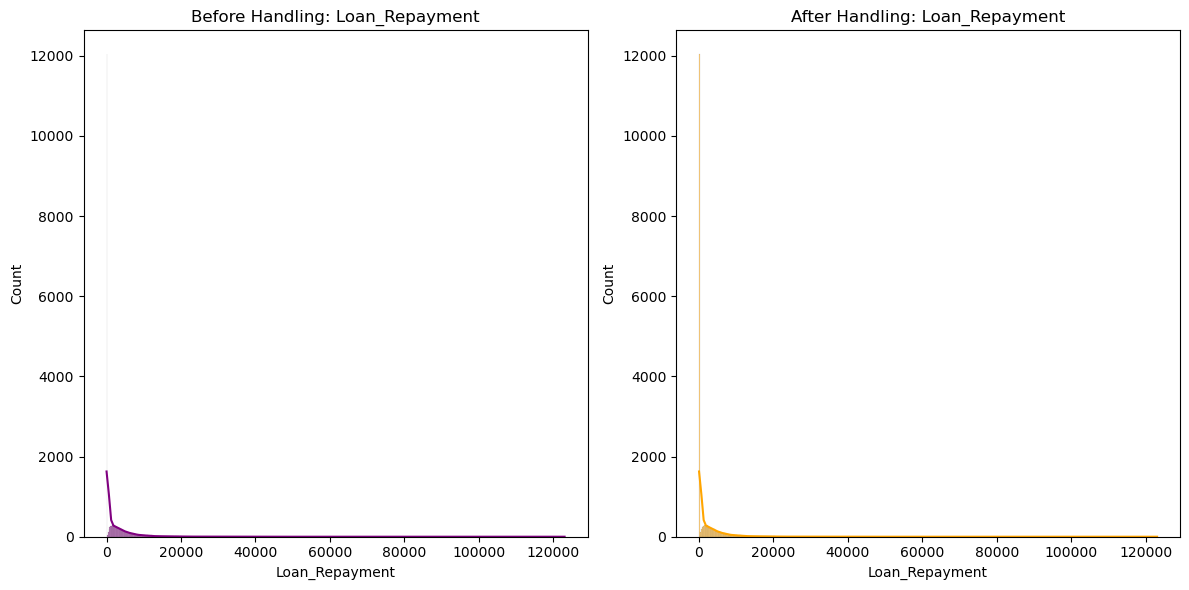

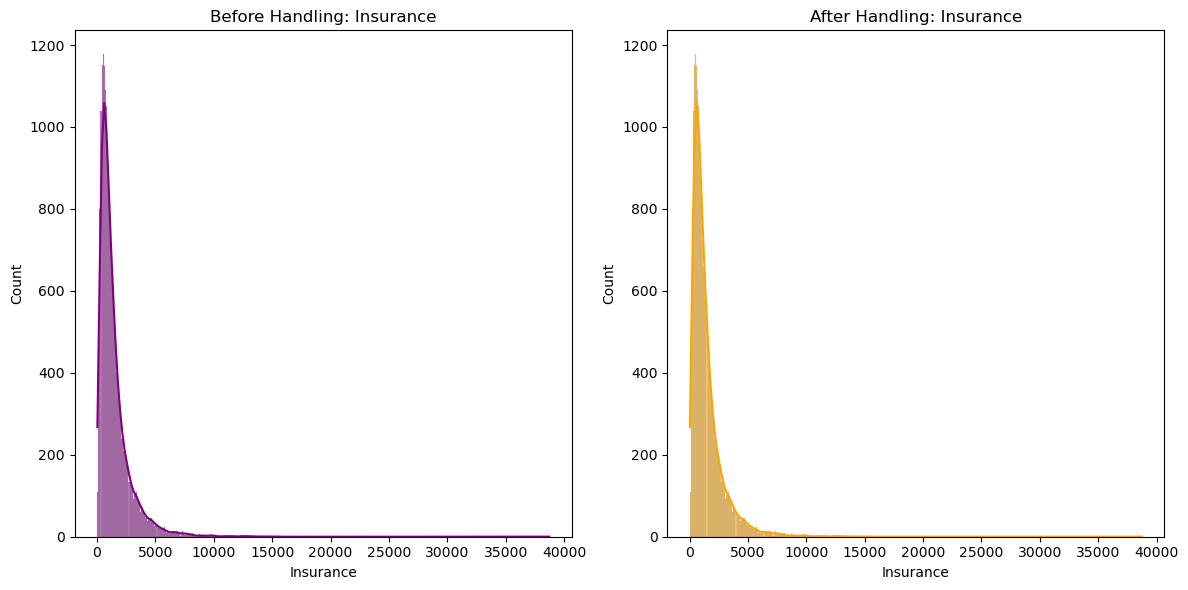

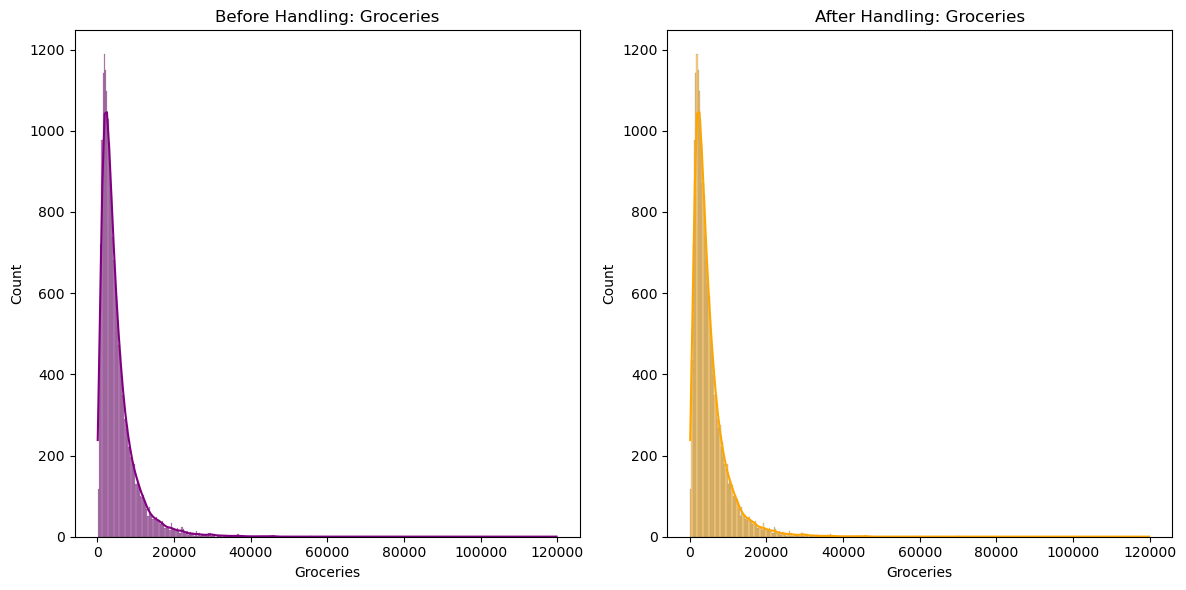

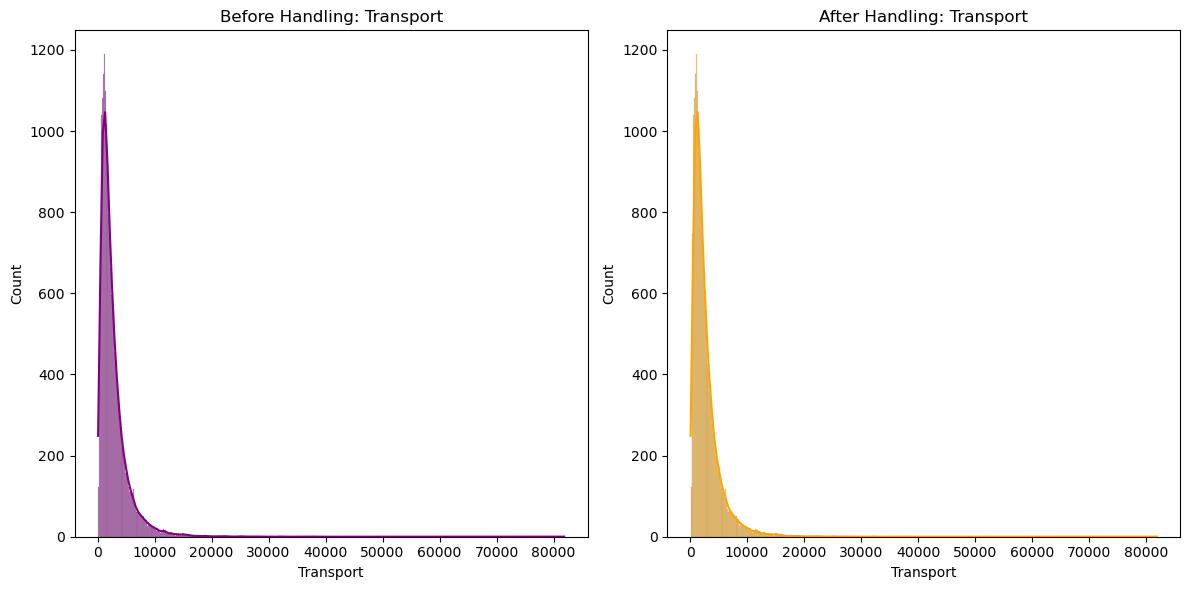

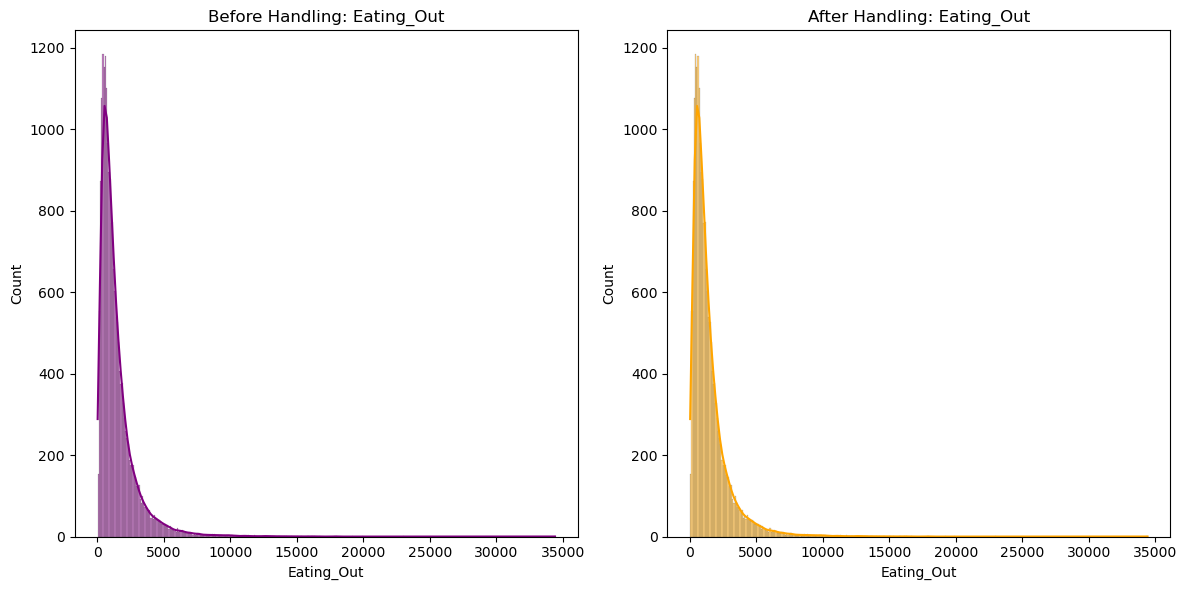

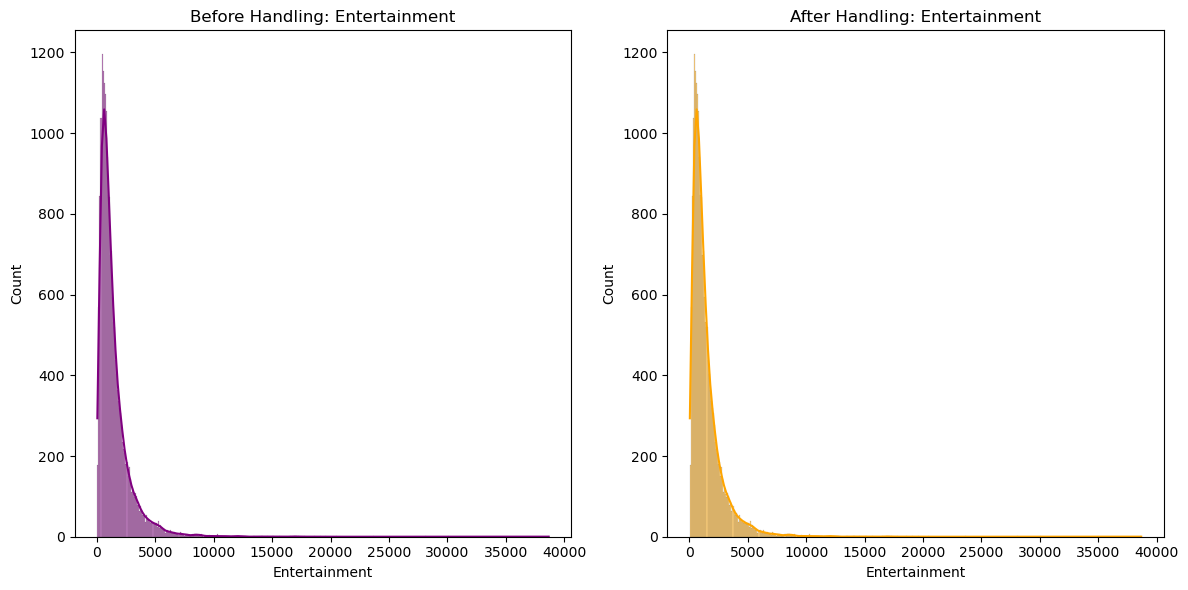

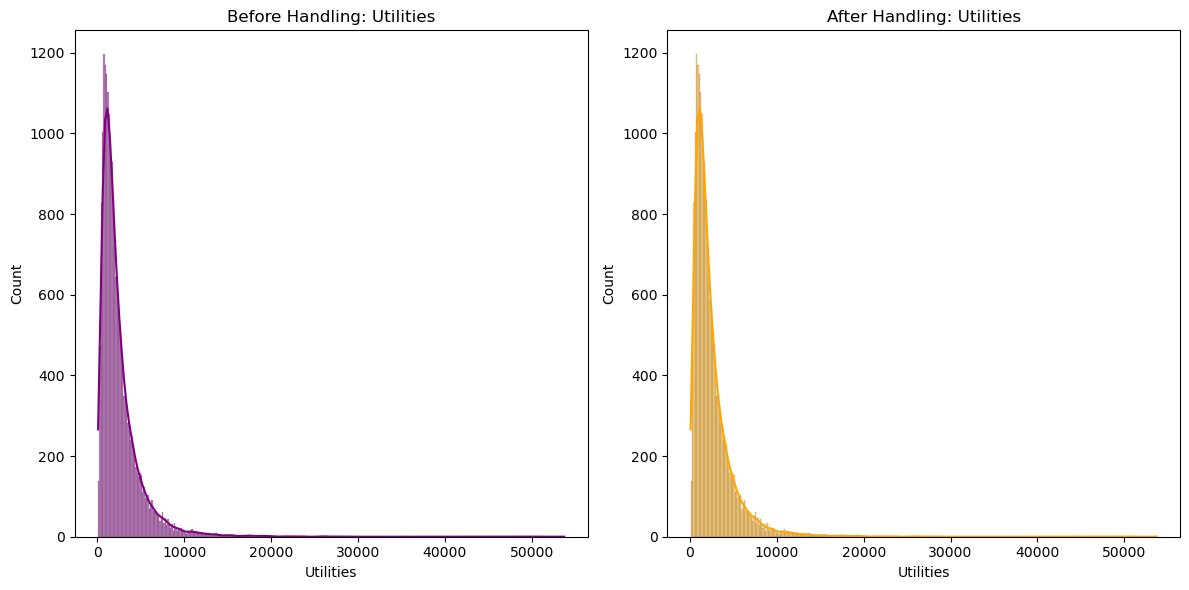

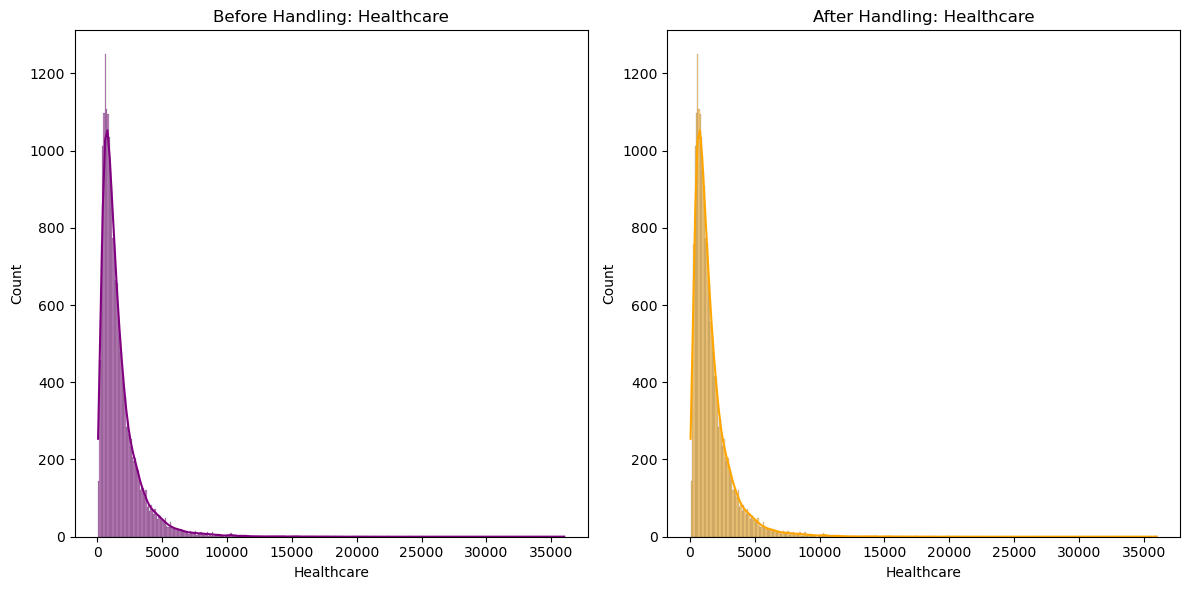

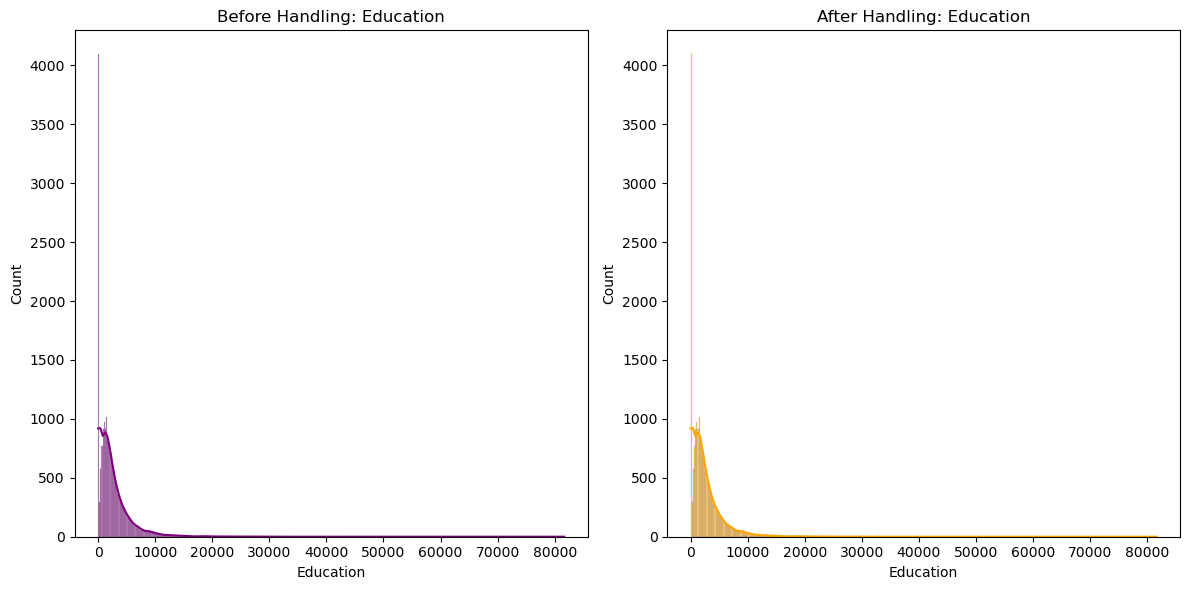

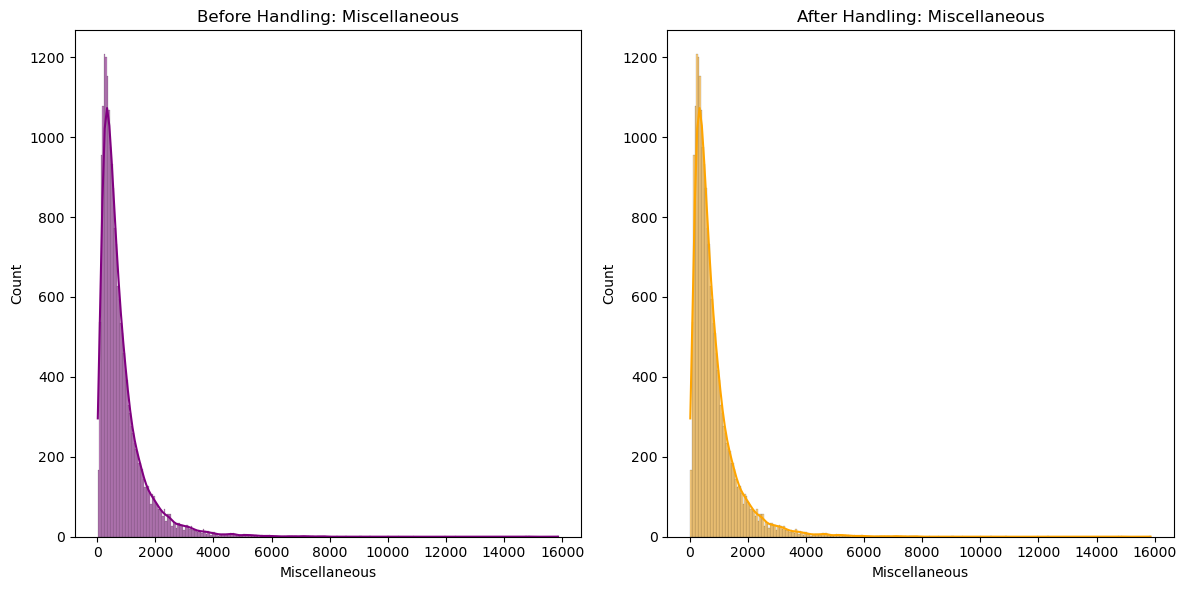

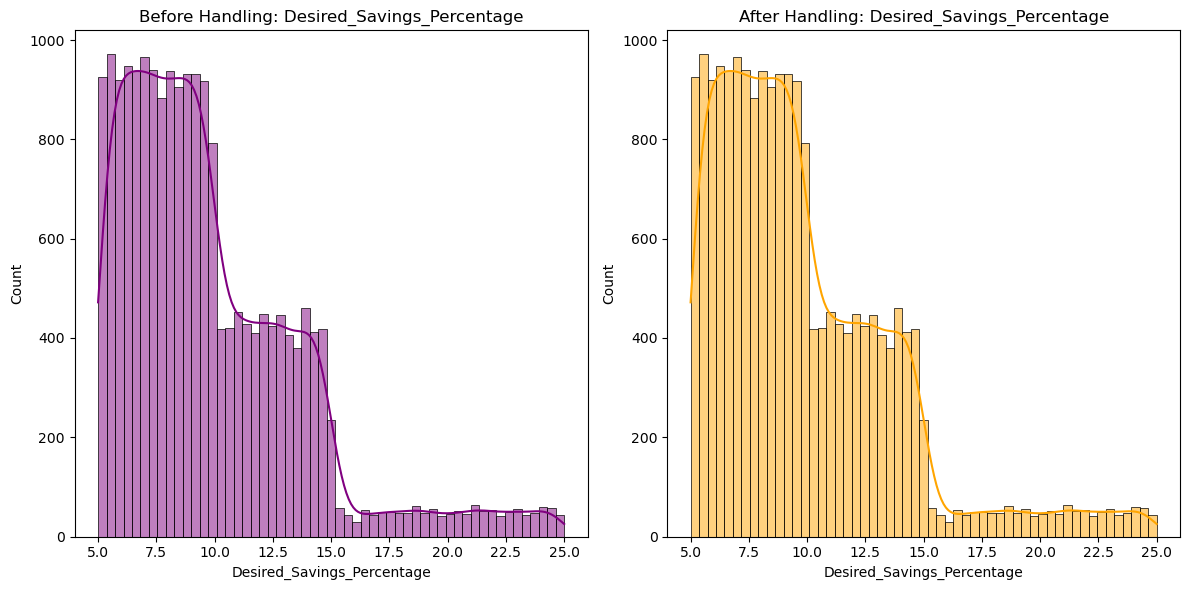

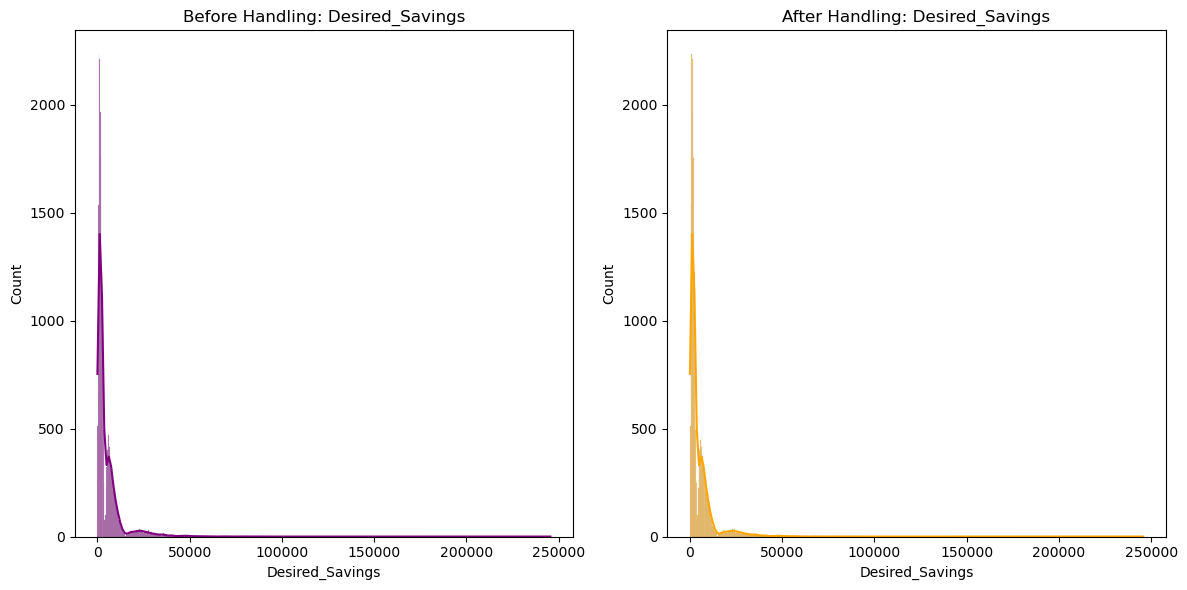

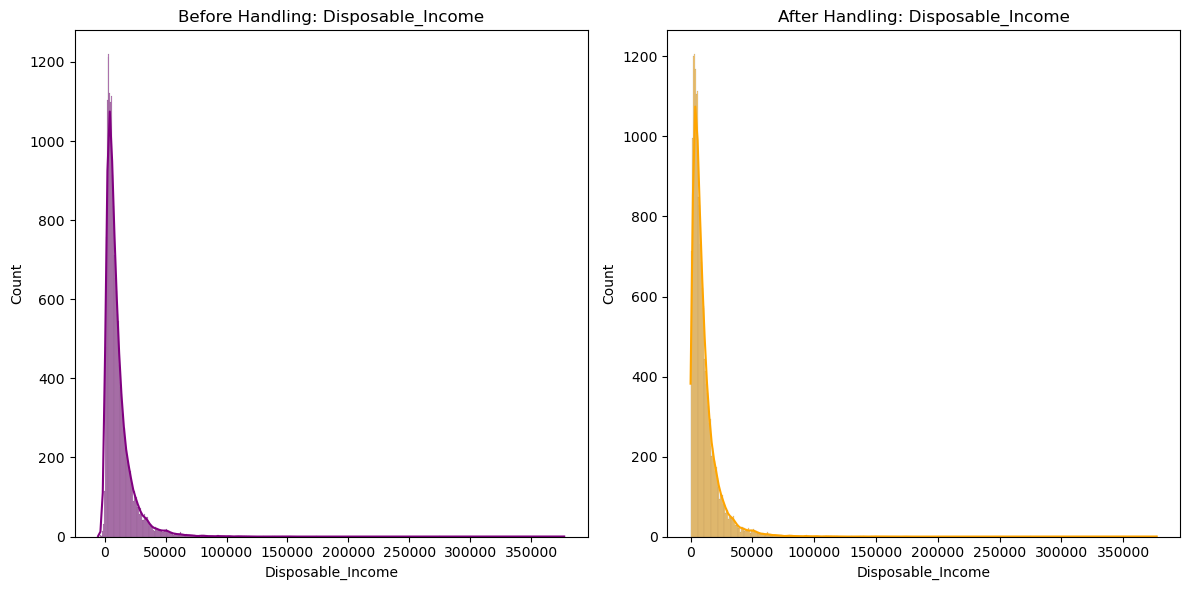

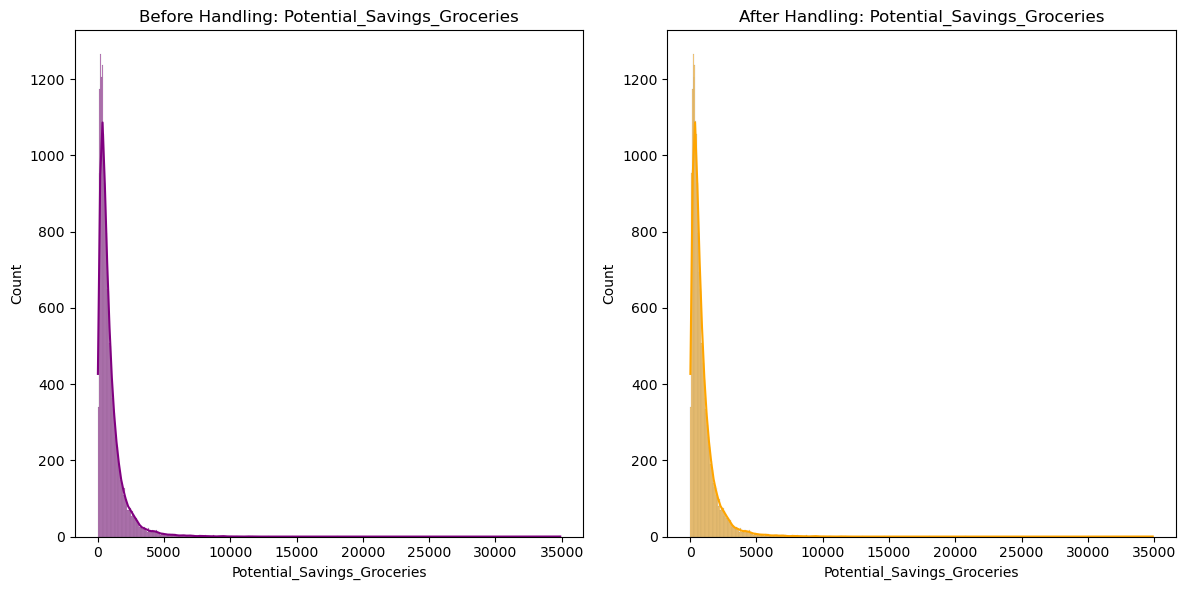

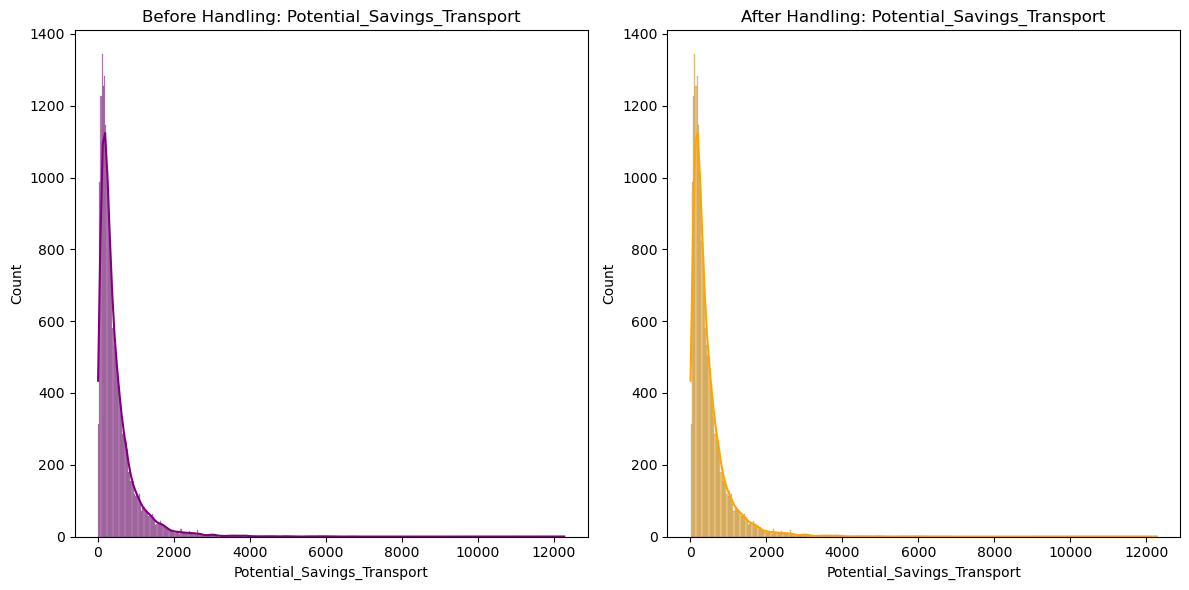

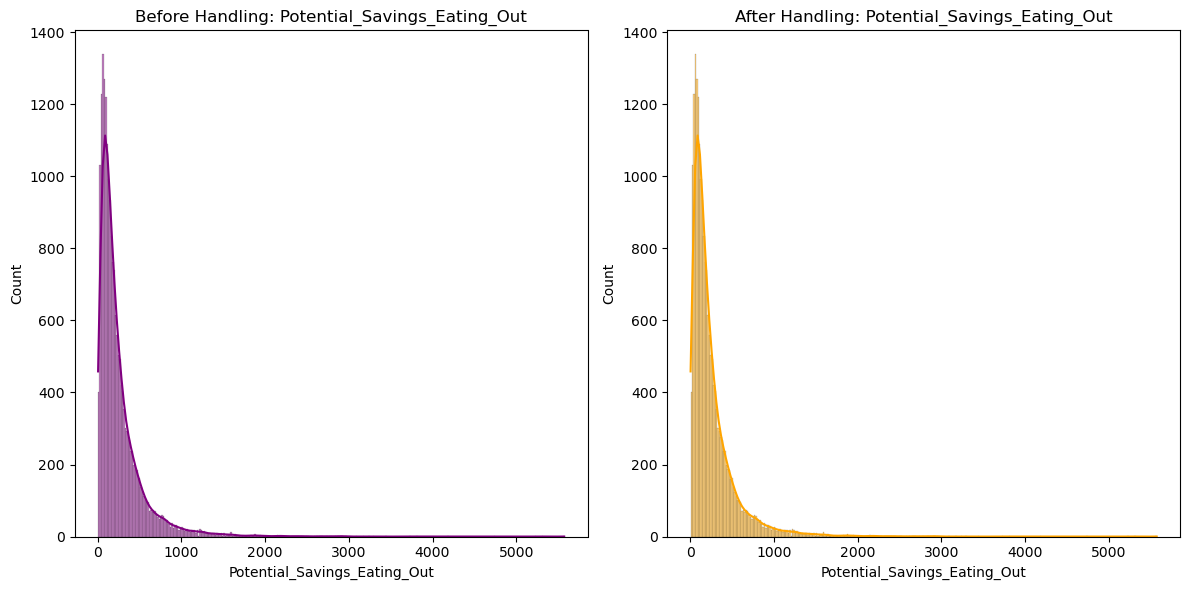

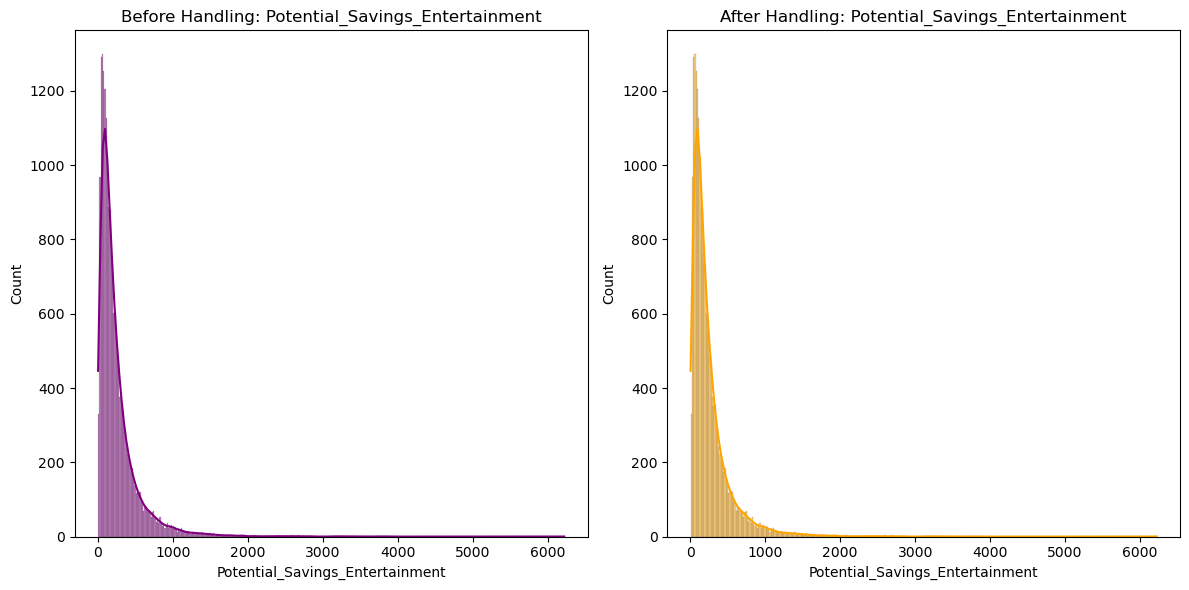

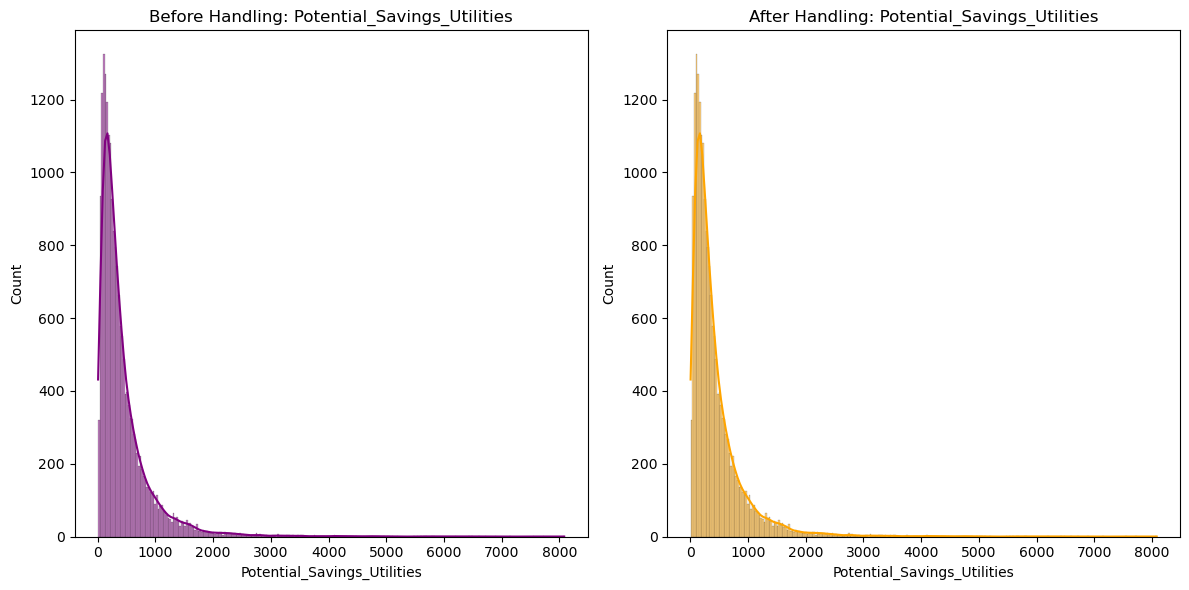

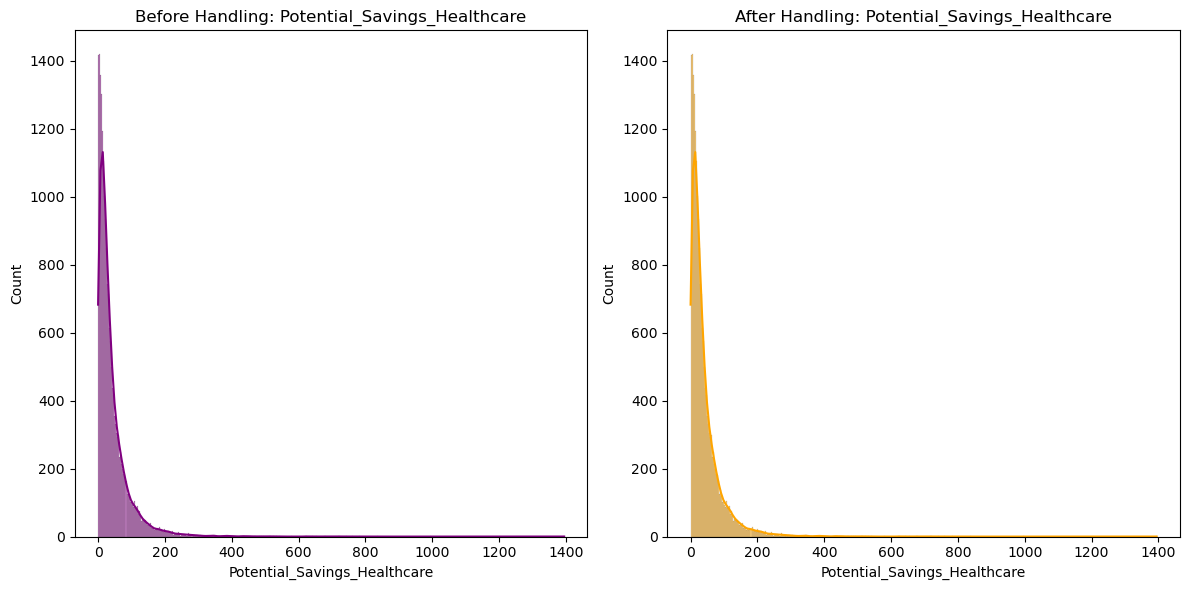

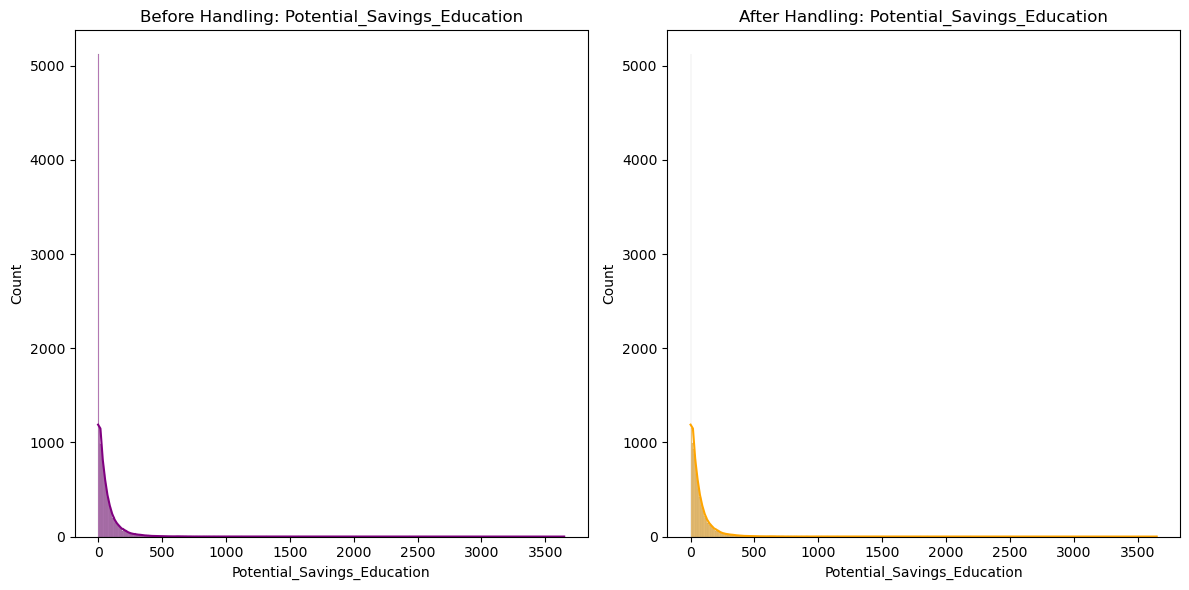

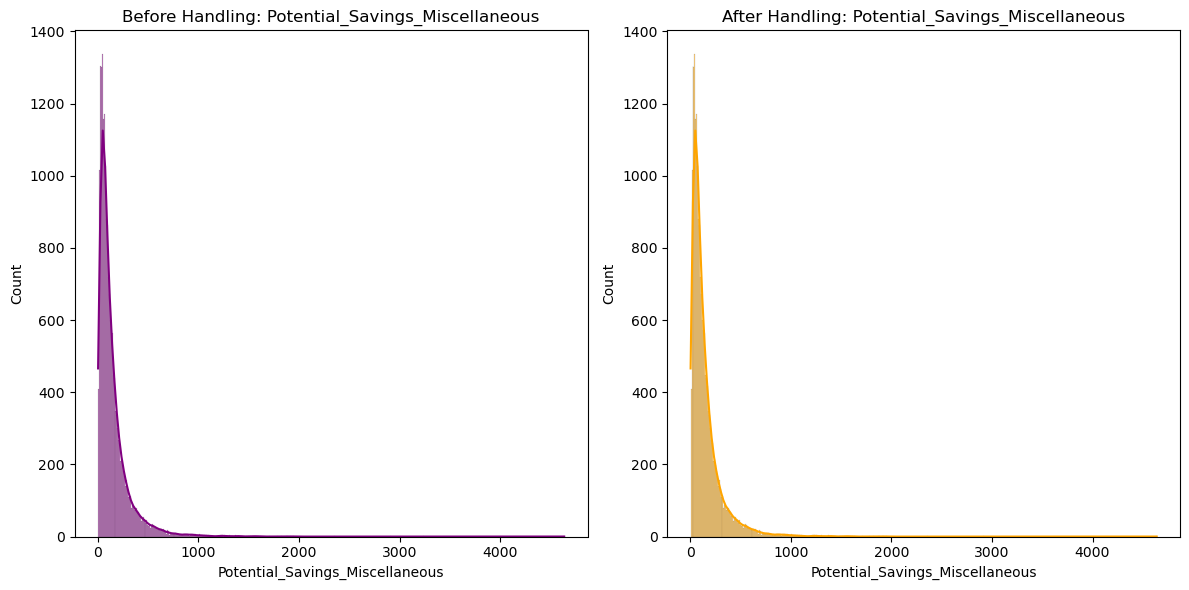

In [14]:
# Plot histograms for before and after handling
for col in num_cols:
    plt.figure(figsize=(12, 6))

    # Before handling
    plt.subplot(1, 2, 1)
    sns.histplot(df_original[col], kde=True, color="purple")
    plt.title(f"Before Handling: {col}")
    plt.xlabel(col)

    # After handling
    plt.subplot(1, 2, 2)
    sns.histplot(df_cleaned[col], kde=True, color="orange")
    plt.title(f"After Handling: {col}")
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

**EDA**

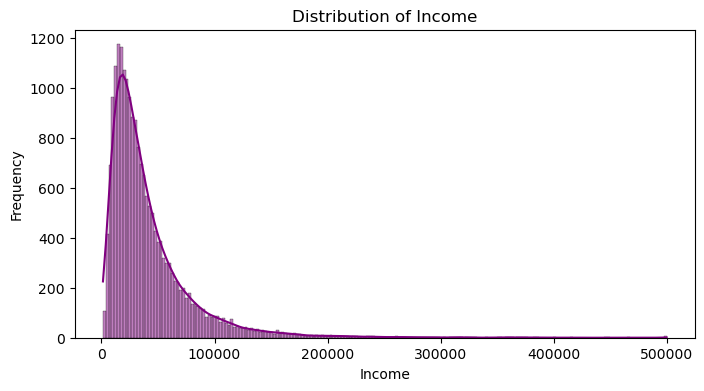

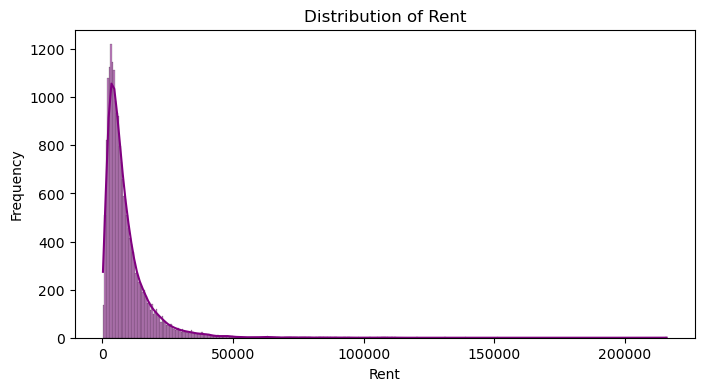

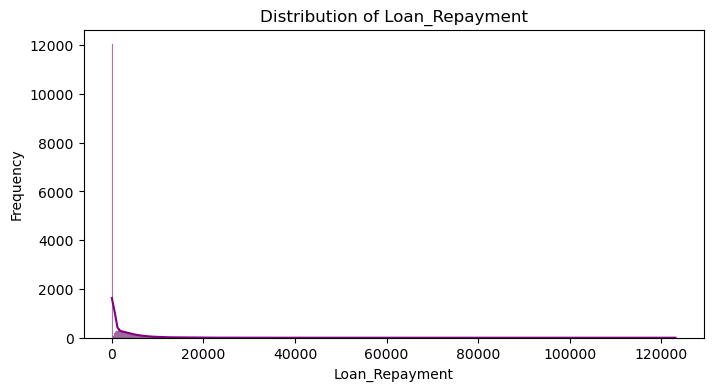

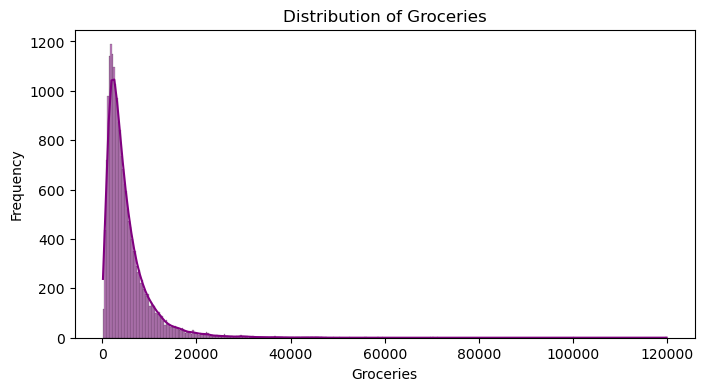

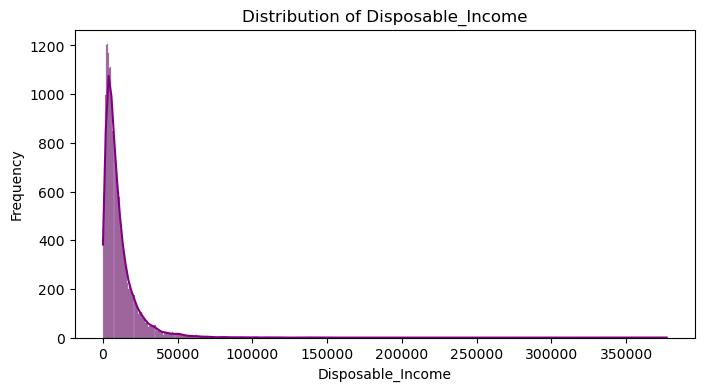

In [16]:
#Distribution Analysis
# List of key financial columns to analyze
key_columns = ['Income', 'Rent', 'Loan_Repayment', 'Groceries', 'Disposable_Income']

# Visualize distributions
for col in key_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cleaned[col], kde=True, color="purple")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

The histograms highlight that most financial variables, like Income, Rent, and Disposable Income, are right-skewed. This reflects a concentration of individuals in the lower range for most metrics, with a gradual tapering toward higher values. These distributions are typical in financial datasets and emphasize variability among individuals.

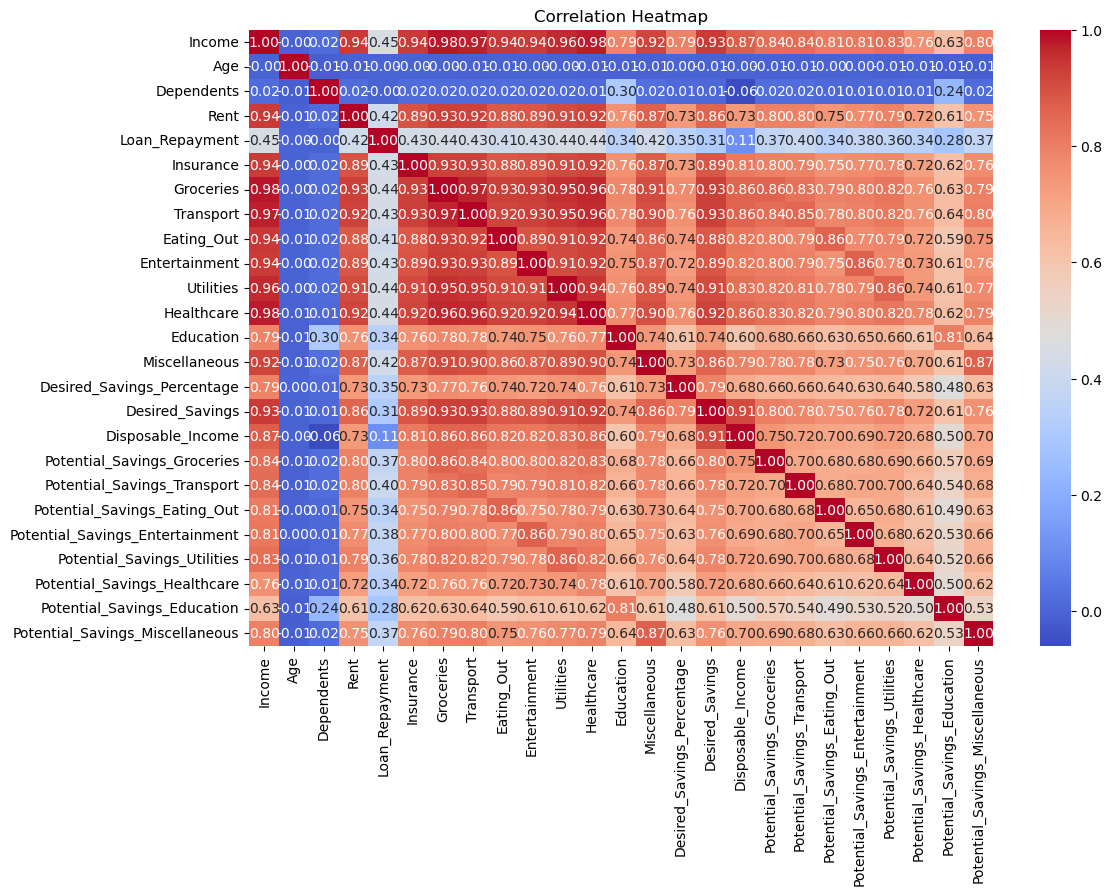

In [18]:
#Correlation Heatmap
# Drop non-numerical columns before calculating the correlation matrix
numerical_df = df_cleaned.select_dtypes(include=['float64', 'int64'])  # Select only numerical columns

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap reveals strong positive relationships, such as between Income and Disposable Income, and among spending categories like Groceries and Eating Out. Negative correlations, like between Dependents and Disposable Income, show how familial responsibilities influence financial flexibility. These trends are critical for identifying predictive features.

C:\Users\sneha\AppData\Local\Temp\ipykernel_11168\2207055355.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_by_tier = df_cleaned.groupby('Income_Tier')[spending_columns].mean()


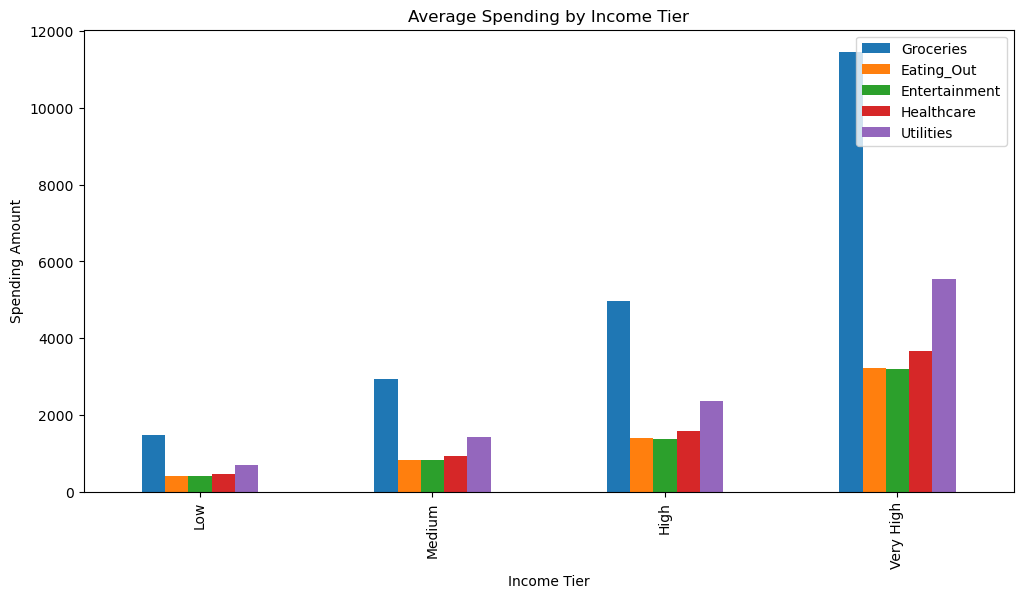

In [20]:
#Spending Patterns by Demographics
# Group by age ranges or income tiers
df_cleaned['Income_Tier'] = pd.qcut(df_cleaned['Income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Spending patterns by income tier
spending_columns = ['Groceries', 'Eating_Out', 'Entertainment', 'Healthcare', 'Utilities']
spending_by_tier = df_cleaned.groupby('Income_Tier')[spending_columns].mean()

# Visualize
spending_by_tier.plot(kind='bar', figsize=(12, 6))
plt.title('Average Spending by Income Tier')
plt.ylabel('Spending Amount')
plt.xlabel('Income Tier')
plt.legend(loc='upper right')
plt.show()

The income tier bar chart demonstrates increased spending across all categories, especially Groceries and Entertainment, as income levels rise. Utility spending remains relatively stable, reflecting its essential nature. This visualization emphasizes how spending habits scale with income, offering insights into budget personalization.

**Feature Engineering**

In [23]:
df_cleaned.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous', 'Income_Tier'],
      dtype='object')

In [24]:
# Step 1: Aggregate Total Expenses
df_cleaned['Total_Expenses'] = (
    df_cleaned['Rent'] + df_cleaned['Loan_Repayment'] + df_cleaned['Groceries'] +
    df_cleaned['Transport'] + df_cleaned['Eating_Out'] + df_cleaned['Entertainment'] +
    df_cleaned['Utilities'] + df_cleaned['Healthcare'] + df_cleaned['Education'] +
    df_cleaned['Miscellaneous']
)

# Step 2: Overspending Flag
# Flag users if Disposable Income is less than 10% of Income
df_cleaned['Overspending_Flag'] = (df_cleaned['Disposable_Income'] < 0.1 * df_cleaned['Income']).astype(int)

# Step 3: Savings Efficiency
# Calculate efficiency of savings as a proportion of income
df_cleaned['Savings_Efficiency'] = df_cleaned['Disposable_Income'] / df_cleaned['Income']
df_cleaned['Savings_Efficiency'] = df_cleaned['Savings_Efficiency'].clip(lower=0)  # Avoid negative efficiencies

# Step 4: Spending Patterns
# Break down expenses into essential and non-essential categories
df_cleaned['Essential_Expenses'] = (
    df_cleaned['Rent'] + df_cleaned['Groceries'] + df_cleaned['Utilities'] +
    df_cleaned['Healthcare'] + df_cleaned['Loan_Repayment']
)
df_cleaned['Non_Essential_Expenses'] = (
    df_cleaned['Eating_Out'] + df_cleaned['Entertainment'] + df_cleaned['Miscellaneous']
)

# Step 5: Spending Ratios
# Create meaningful ratios to understand spending behavior
df_cleaned['Rent_to_Income_Ratio'] = df_cleaned['Rent'] / df_cleaned['Income']
df_cleaned['Groceries_to_Income_Ratio'] = df_cleaned['Groceries'] / df_cleaned['Income']
df_cleaned['Total_Expenses_to_Income_Ratio'] = df_cleaned['Total_Expenses'] / df_cleaned['Income']
df_cleaned['Discretionary_to_Income_Ratio'] = df_cleaned['Non_Essential_Expenses'] / df_cleaned['Income']

# Step 6: Categorize Users into Income Tiers
# Divide users into four income-based categories
df_cleaned['Income_Tier'] = pd.qcut(df_cleaned['Income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Step 7: Filter Unrealistic Data
# Exclude rows where total expenses exceed income
df_cleaned = df_cleaned[df_cleaned['Total_Expenses'] <= df_cleaned['Income']]

#Savings Target Efficiency:
df_cleaned['Savings_Target_Efficiency'] = df_cleaned['Savings_Efficiency'] / (df_cleaned['Desired_Savings'] / df_cleaned['Income'])


#Spending Diversity Index:
df_cleaned['Expense_Diversity_Index'] = df_cleaned[['Rent', 'Groceries', 'Transport', 'Eating_Out',
                                                    'Entertainment']].std(axis=1) / df_cleaned['Total_Expenses']


# Final Preview
print("Feature Engineering Completed. Here's a preview of the cleaned dataset:")
print(df_cleaned.head())

Feature Engineering Completed. Here's a preview of the cleaned dataset:
          Income  Age  Dependents     Occupation City_Tier          Rent  \
0   44637.249636   49           0  Self_Employed    Tier_1  13391.174891   
1   26858.596592   34           2        Retired    Tier_2   5371.719318   
2   50367.605084   35           1        Student    Tier_3   7555.140763   
3  101455.600247   21           0  Self_Employed    Tier_3  15218.340037   
4   24875.283548   52           4   Professional    Tier_2   4975.056710   

   Loan_Repayment    Insurance     Groceries    Transport  ...  \
0        0.000000  2206.490129   6658.768341  2636.970696  ...   
1        0.000000   869.522617   2818.444460  1543.018778  ...   
2     4612.103386  2201.800050   6313.222081  3221.396403  ...   
3     6809.441427  4889.418087  14690.149363  7106.130005  ...   
4     3112.609398   635.907170   3034.329665  1276.155163  ...   

   Overspending_Flag  Savings_Efficiency  Essential_Expenses  \
0         

C:\Users\sneha\AppData\Local\Temp\ipykernel_11168\2540341201.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Savings_Target_Efficiency'] = df_cleaned['Savings_Efficiency'] / (df_cleaned['Desired_Savings'] / df_cleaned['Income'])
C:\Users\sneha\AppData\Local\Temp\ipykernel_11168\2540341201.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Expense_Diversity_Index'] = df_cleaned[['Rent', 'Groceries', 'Transport', 'Eating_Out',


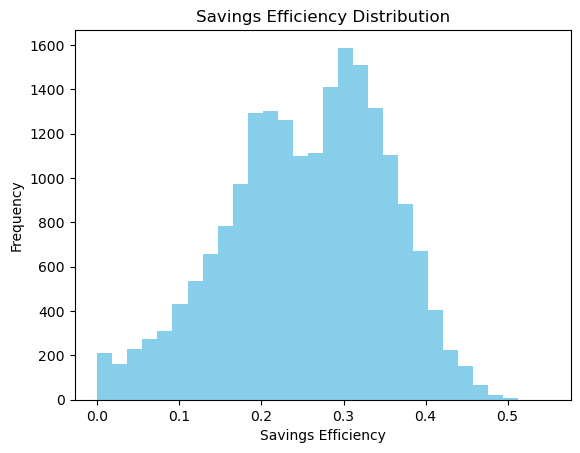

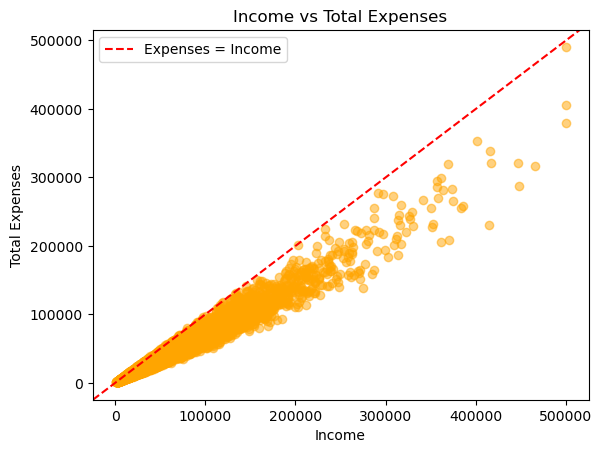

In [25]:
# Visualization Examples (Optional)
# Distribution of Savings Efficiency
plt.hist(df_cleaned['Savings_Efficiency'], bins=30, color='skyblue')
plt.title('Savings Efficiency Distribution')
plt.xlabel('Savings Efficiency')
plt.ylabel('Frequency')
plt.show()

# Income vs Total Expenses
plt.scatter(df_cleaned['Income'], df_cleaned['Total_Expenses'], alpha=0.5, color='orange')
plt.axline([0, 0], [1, 1], color='red', linestyle='--', label='Expenses = Income')  # Threshold
plt.title('Income vs Total Expenses')
plt.xlabel('Income')
plt.ylabel('Total Expenses')
plt.legend()
plt.show()

In [26]:
# Check for null values
null_summary = df_cleaned.isnull().sum()
print("Null Values in Each Column:")
print(null_summary[null_summary > 0])

Null Values in Each Column:
Savings_Target_Efficiency    100
dtype: int64


In [27]:
df_cleaned.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous', 'Income_Tier', 'Total_Expenses',
       'Overspending_Flag', 'Savings_Efficiency', 'Essential_Expenses',
       'Non_Essential_Expenses', 'Rent_to_Income_Ratio',
       'Groceries_to_Income_Ratio', 'Total_Expenses_to_Income_Ratio',
       'Discretionary_to_Income_Ratio', 'Savings_Target_Efficiency',
       'Expense_Diversity_Index'],
      dtype='object')

In [28]:
# Step 1: Check for Null Values
print("Checking for null values in the dataset:")
print(df_cleaned.isnull().sum())

# If null values exist, print column names and their counts
if df_cleaned.isnull().sum().sum() > 0:
    print("\nColumns with null values:")
    print(df_cleaned[df_cleaned.columns[df_cleaned.isnull().any()]].isnull().sum())
else:
    print("\nNo null values found in the dataset.")

Checking for null values in the dataset:
Income                               0
Age                                  0
Dependents                           0
Occupation                           0
City_Tier                            0
Rent                                 0
Loan_Repayment                       0
Insurance                            0
Groceries                            0
Transport                            0
Eating_Out                           0
Entertainment                        0
Utilities                            0
Healthcare                           0
Education                            0
Miscellaneous                        0
Desired_Savings_Percentage           0
Desired_Savings                      0
Disposable_Income                    0
Potential_Savings_Groceries          0
Potential_Savings_Transport          0
Potential_Savings_Eating_Out         0
Potential_Savings_Entertainment      0
Potential_Savings_Utilities          0
Potential_Savings_Healt

In [29]:
#filling null values with median
df_cleaned['Savings_Target_Efficiency'].fillna(df_cleaned['Savings_Target_Efficiency'].median(), inplace=True)

C:\Users\sneha\AppData\Local\Temp\ipykernel_11168\2536652002.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Savings_Target_Efficiency'].fillna(df_cleaned['Savings_Target_Efficiency'].median(), inplace=True)
C:\Users\sneha\AppData\Local\Temp\ipykernel_11168\2536652002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean

In [30]:
# Check for null values
null_summary = df_cleaned.isnull().sum()
print("Null Values in Each Column:")
print(null_summary[null_summary > 0])

Null Values in Each Column:
Series([], dtype: int64)


In [31]:
# Step 2: Check for Duplicates
print("\nChecking for duplicate rows in the dataset...")
duplicates = df_cleaned.duplicated()
if duplicates.sum() > 0:
    print(f"Number of duplicate rows: {duplicates.sum()}")
    # Remove duplicates if found
    df_cleaned = df_cleaned[~duplicates]
    print("Duplicates removed.")
else:
    print("No duplicate rows found in the dataset.")


Checking for duplicate rows in the dataset...
No duplicate rows found in the dataset.



Visualizing outliers using boxplots...


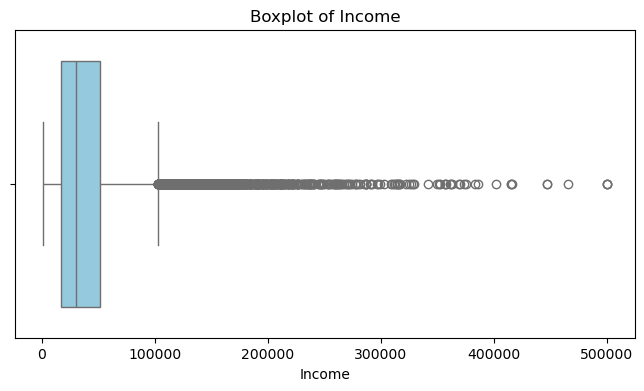

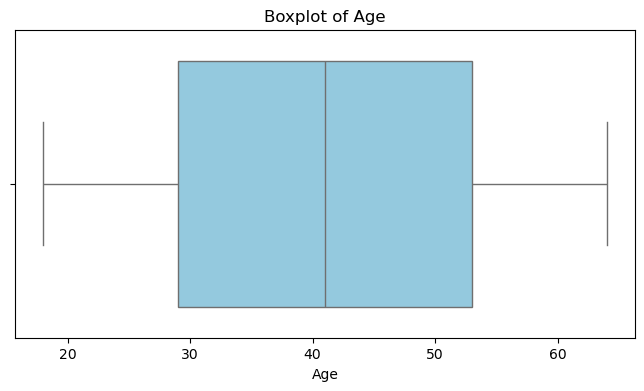

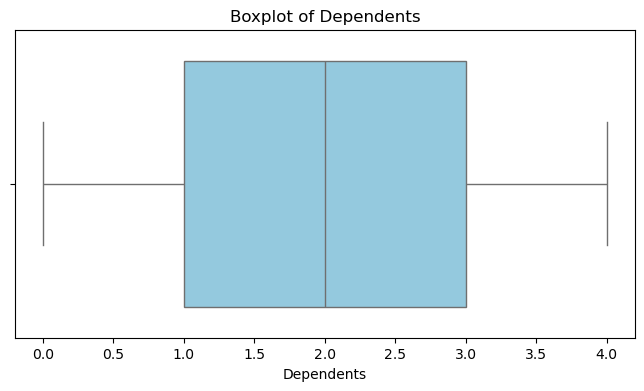

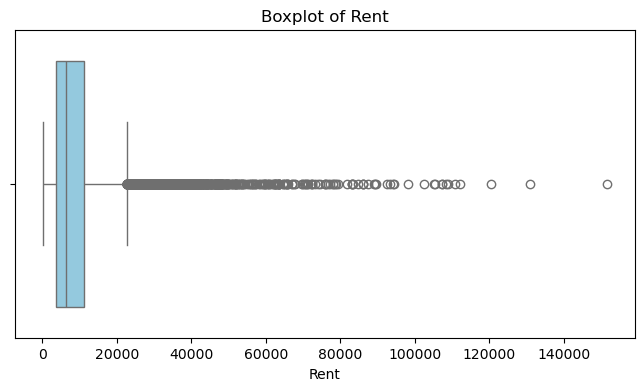

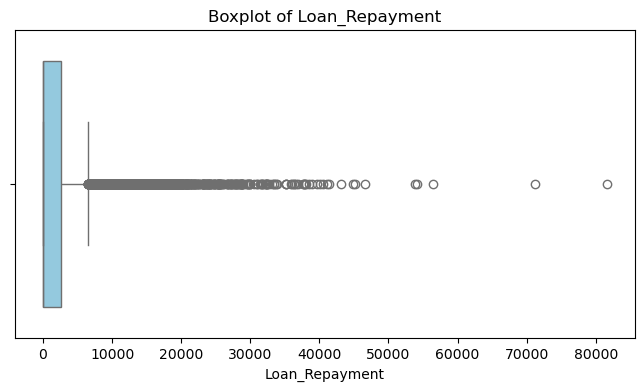

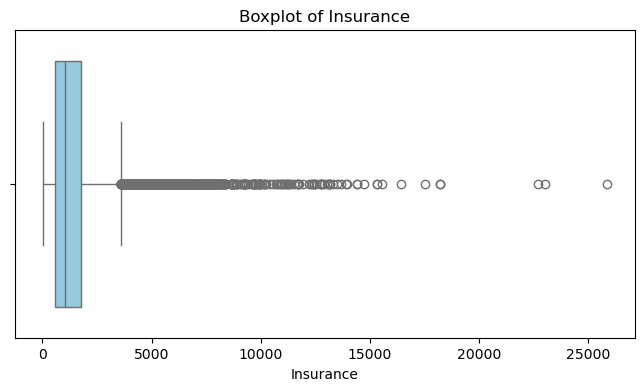

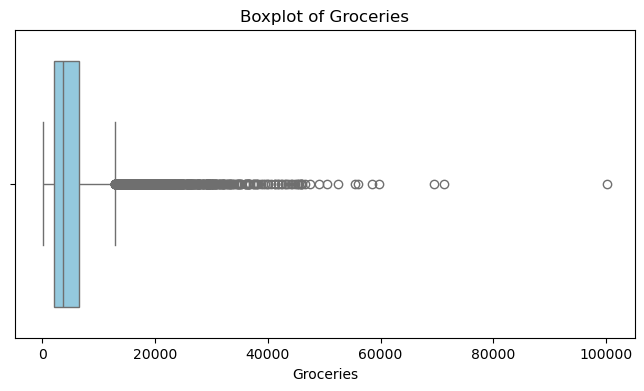

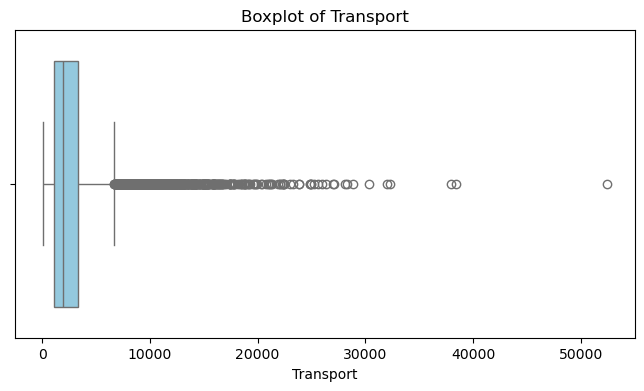

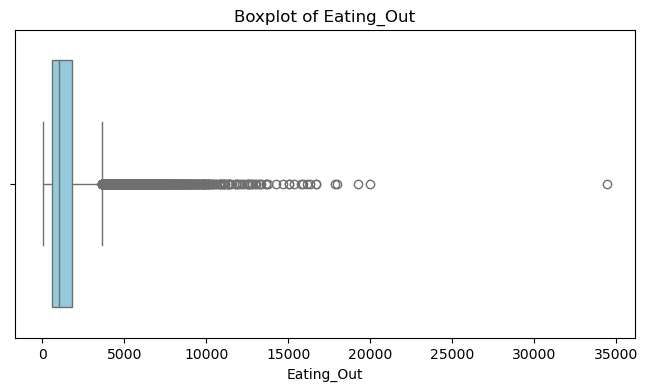

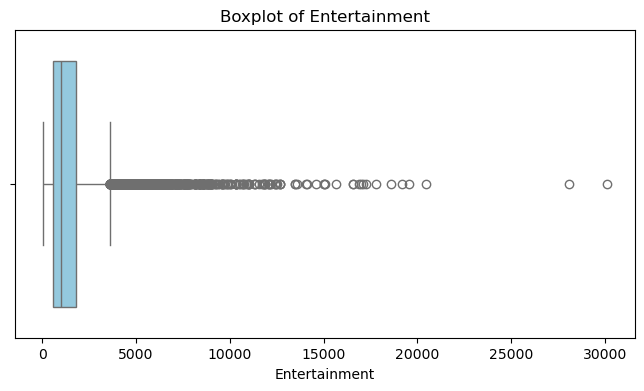

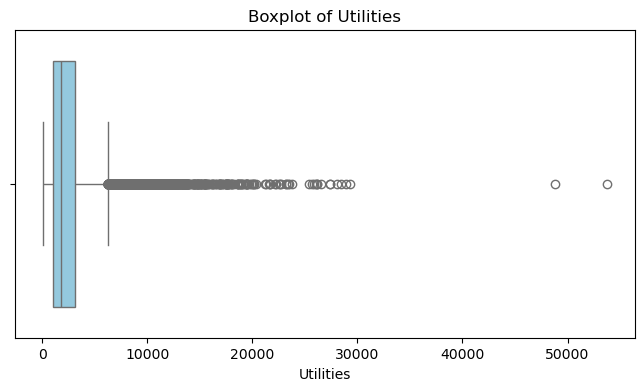

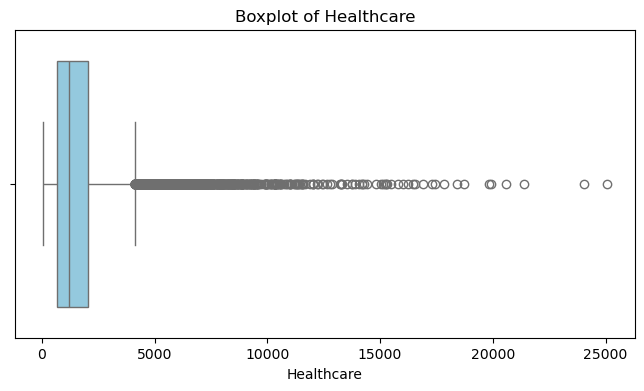

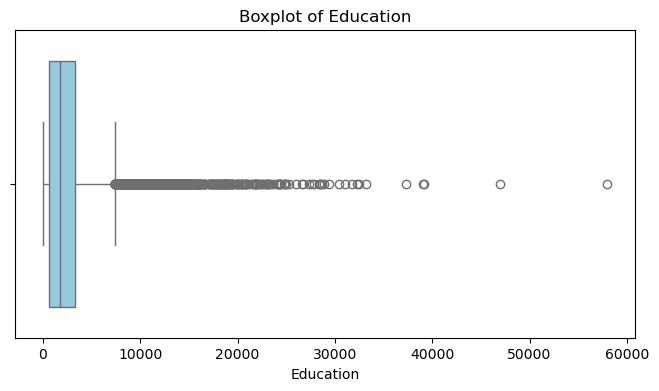

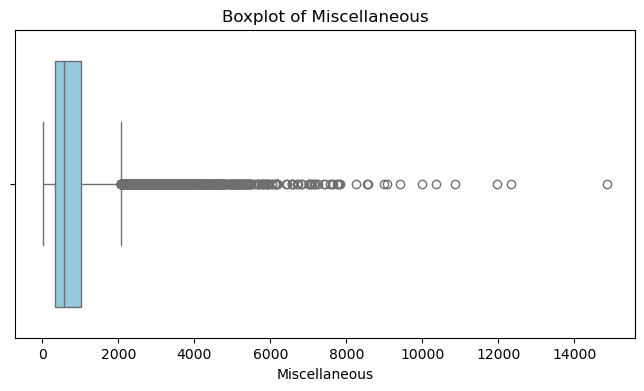

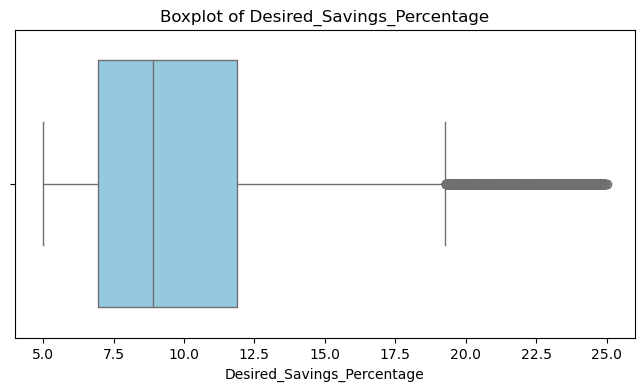

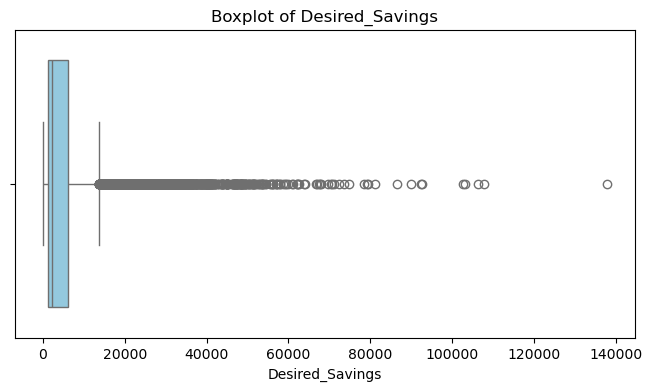

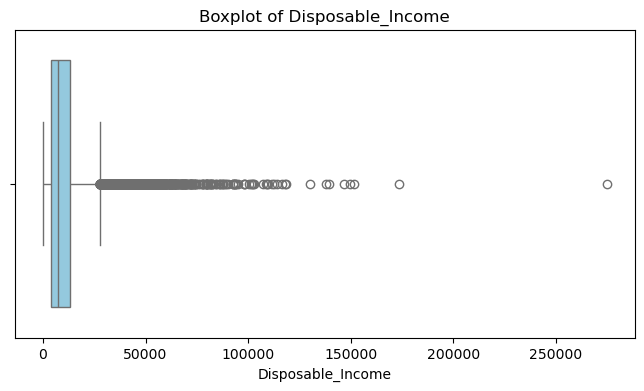

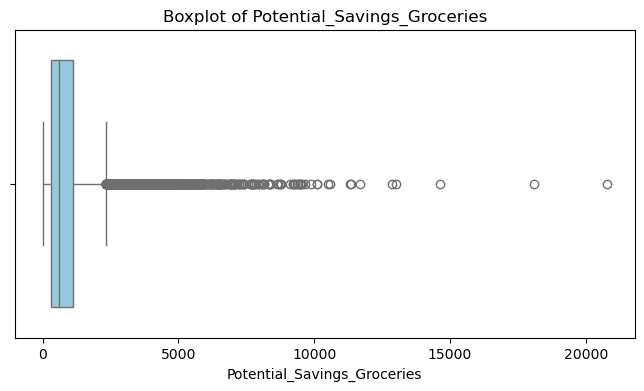

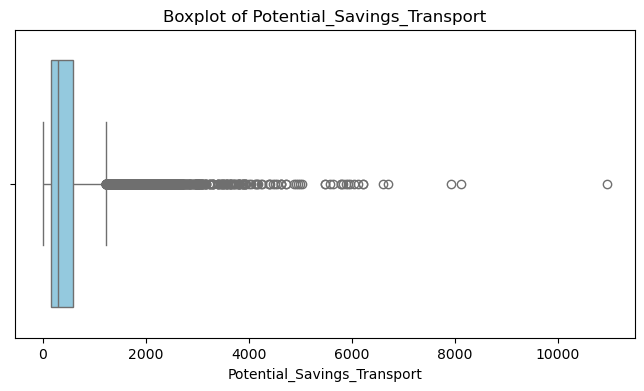

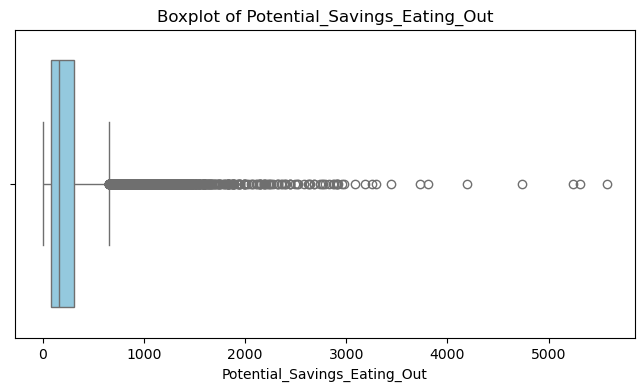

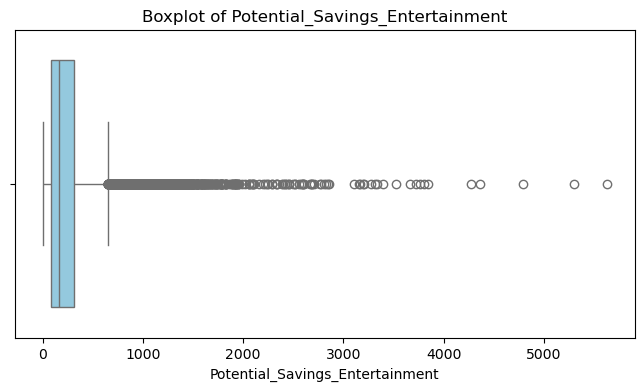

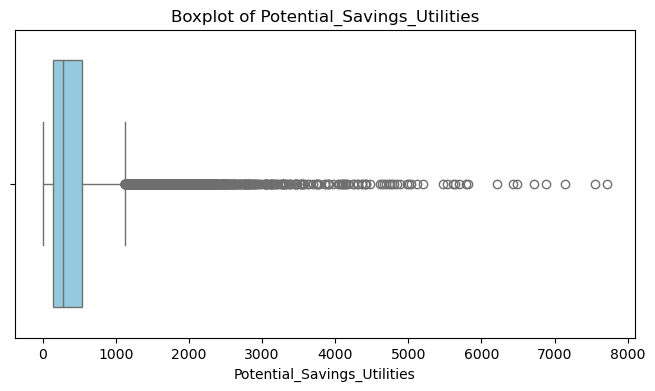

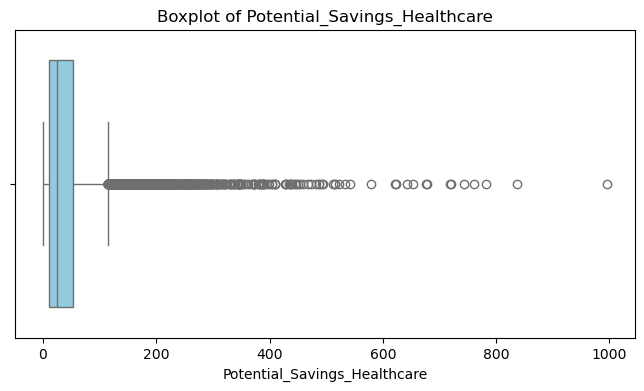

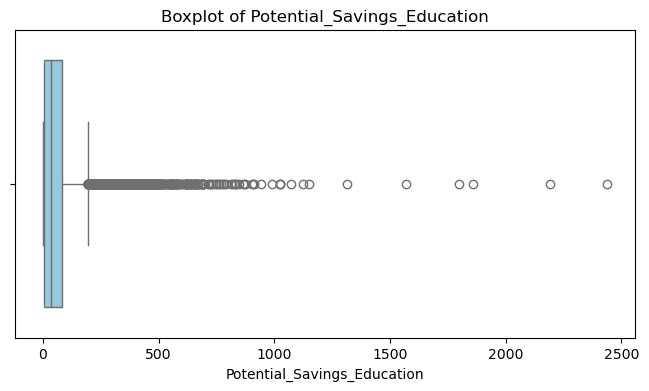

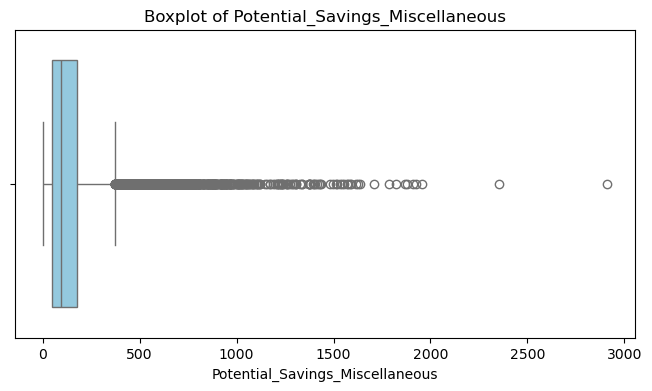

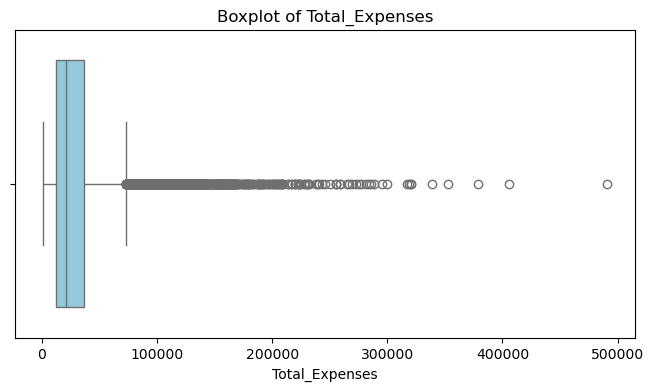

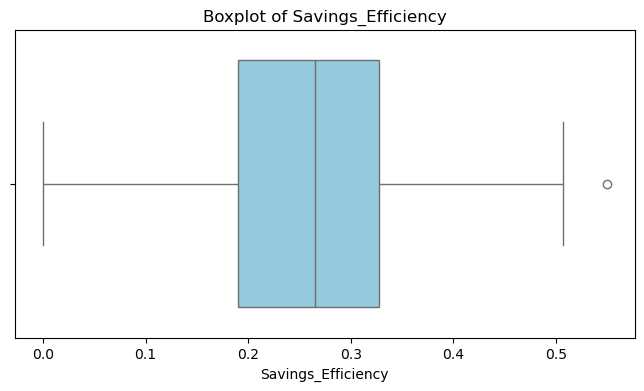

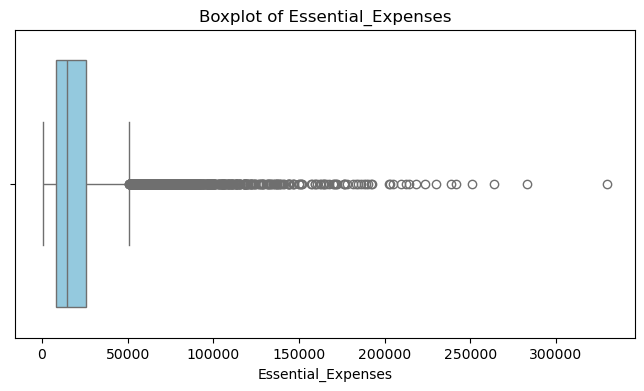

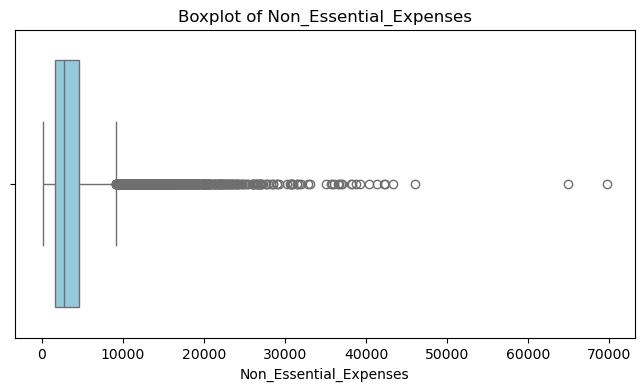

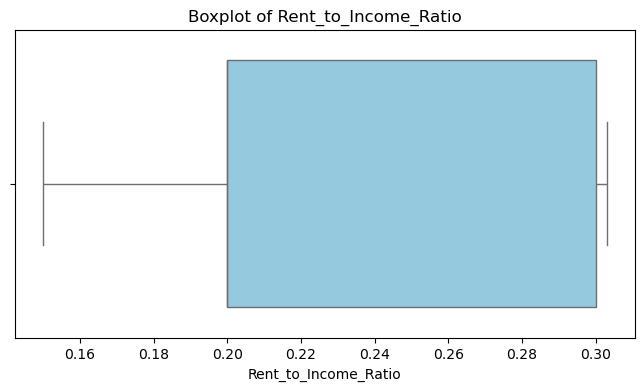

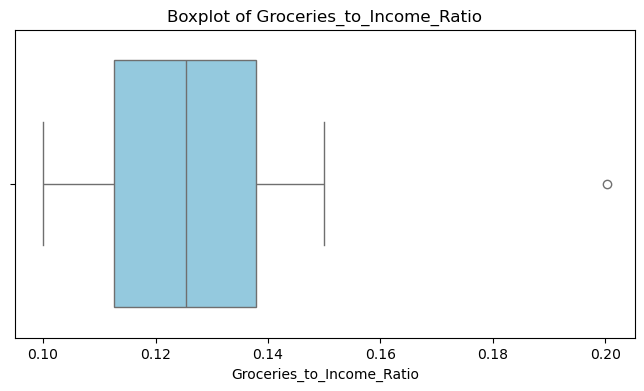

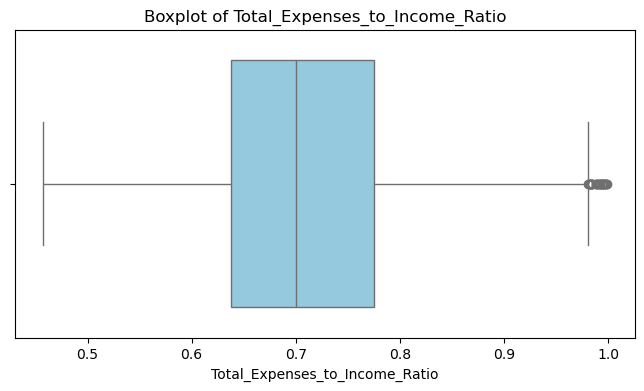

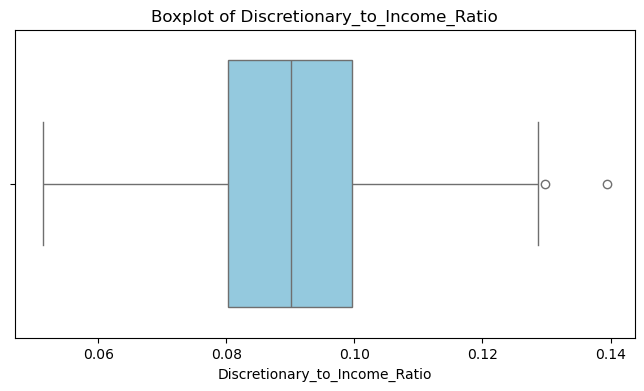

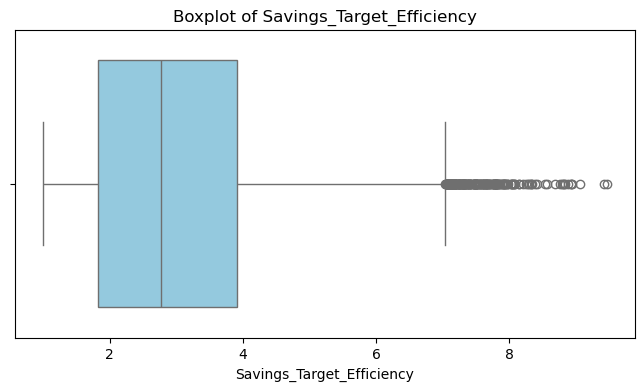

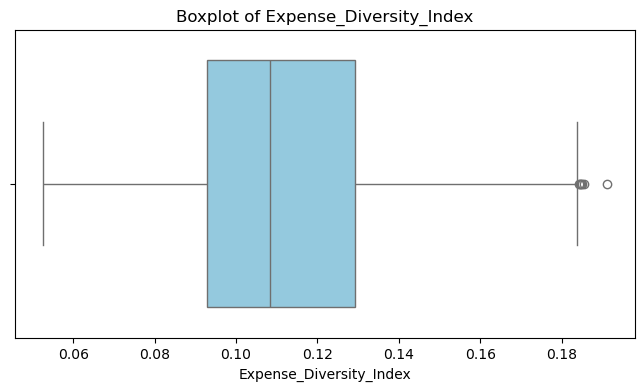

In [32]:
# Step 3: Outlier Detection
# Outlier detection for numerical columns using boxplots
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

print("\nVisualizing outliers using boxplots...")
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_cleaned, x=col, color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [33]:
import pandas as pd

# Ensure the DataFrame is explicitly copied if filtered earlier
df_cleaned = df_cleaned.copy()

# Step: Filter extreme outliers using 1st and 99th percentiles
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    lower_bound = df_cleaned[col].quantile(0.01)  # 1st percentile
    upper_bound = df_cleaned[col].quantile(0.99)  # 99th percentile
    df_cleaned.loc[:, col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)  # Use .loc[] for safe assignment

print("Outliers capped successfully.")

Outliers capped successfully.


In [34]:
# Step to reassign unique integer User IDs
df_cleaned['User_ID'] = list(range(1, len(df_cleaned) + 1))

In [35]:
# Step 4: Dataset Summary
print("\nDataset summary after validation:")
print(df_cleaned.info())
print("\nPreview of the dataset:")
print(df_cleaned.head())


Dataset summary after validation:
<class 'pandas.core.frame.DataFrame'>
Index: 19986 entries, 0 to 19999
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Income                           19986 non-null  float64 
 1   Age                              19986 non-null  int64   
 2   Dependents                       19986 non-null  int64   
 3   Occupation                       19986 non-null  object  
 4   City_Tier                        19986 non-null  object  
 5   Rent                             19986 non-null  float64 
 6   Loan_Repayment                   19986 non-null  float64 
 7   Insurance                        19986 non-null  float64 
 8   Groceries                        19986 non-null  float64 
 9   Transport                        19986 non-null  float64 
 10  Eating_Out                       19986 non-null  float64 
 11  Entertainment                    1998

In [36]:
# Display first few rows of the cleaned dataset
print("Preview of the Cleaned Dataset:")
print(df_cleaned.head())

# Display dataset info to check data types and null values
print("\nDataset Information:")
print(df_cleaned.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df_cleaned.describe())

# Check for any remaining null values
print("\nNull Values in the Dataset:")
print(df_cleaned.isnull().sum())

# Verify unique values for categorical columns
categorical_columns = ['Occupation', 'City_Tier', 'Income_Tier']
print("\nUnique Values in Categorical Columns:")
for col in categorical_columns:
    print(f"{col}: {df_cleaned[col].unique()}")

Preview of the Cleaned Dataset:
          Income  Age  Dependents     Occupation City_Tier          Rent  \
0   44637.249636   49           0  Self_Employed    Tier_1  13391.174891   
1   26858.596592   34           2        Retired    Tier_2   5371.719318   
2   50367.605084   35           1        Student    Tier_3   7555.140763   
3  101455.600247   21           0  Self_Employed    Tier_3  15218.340037   
4   24875.283548   52           4   Professional    Tier_2   4975.056710   

   Loan_Repayment    Insurance     Groceries    Transport  ...  \
0        0.000000  2206.490129   6658.768341  2636.970696  ...   
1        0.000000   869.522617   2818.444460  1543.018778  ...   
2     4612.103386  2201.800050   6313.222081  3221.396403  ...   
3     6809.441427  4889.418087  14690.149363  7106.130005  ...   
4     3112.609398   635.907170   3034.329665  1276.155163  ...   

   Savings_Efficiency  Essential_Expenses  Non_Essential_Expenses  \
0            0.252382        24508.650001    

In [37]:
# Function to detect and count outliers for a single column
def count_outliers(series):
    Q1 = series.quantile(0.25)  # First quartile
    Q3 = series.quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count values below lower bound and above upper bound
    outliers = ((series < lower_bound) | (series > upper_bound)).sum()
    return outliers

# Numerical columns to analyze
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Count outliers for each column
outlier_counts = {}
for col in numerical_columns:
    outlier_counts[col] = count_outliers(df_cleaned[col])

# Total number of outliers across all columns
total_outliers = sum(outlier_counts.values())

# Display results
print("Column-wise Outlier Counts:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

print(f"\nTotal Number of Outliers in the Dataset: {total_outliers}")

Column-wise Outlier Counts:
Income: 1251
Age: 0
Dependents: 0
Rent: 1317
Loan_Repayment: 1879
Insurance: 1372
Groceries: 1224
Transport: 1260
Eating_Out: 1324
Entertainment: 1327
Utilities: 1290
Healthcare: 1292
Education: 1158
Miscellaneous: 1347
Desired_Savings_Percentage: 787
Desired_Savings: 1301
Disposable_Income: 1329
Potential_Savings_Groceries: 1399
Potential_Savings_Transport: 1392
Potential_Savings_Eating_Out: 1428
Potential_Savings_Entertainment: 1450
Potential_Savings_Utilities: 1387
Potential_Savings_Healthcare: 1416
Potential_Savings_Education: 1348
Potential_Savings_Miscellaneous: 1468
Total_Expenses: 1257
Savings_Efficiency: 0
Essential_Expenses: 1256
Non_Essential_Expenses: 1287
Rent_to_Income_Ratio: 0
Groceries_to_Income_Ratio: 0
Total_Expenses_to_Income_Ratio: 0
Discretionary_to_Income_Ratio: 0
Savings_Target_Efficiency: 221
Expense_Diversity_Index: 0
User_ID: 0

Total Number of Outliers in the Dataset: 34767


In [38]:
# Step 1: Create a copy of the dataset to ensure safe modifications
df_cleaned = df_cleaned.copy()

# Step 2: Define context-aware outlier handling rules

# Income: Allow high-income variation, cap only extreme unrealistic values
df_cleaned.loc[:, 'Income'] = df_cleaned['Income'].clip(lower=1000, upper=1000000)

# Spending Categories: Use larger multiplier (2 * IQR) for real-world flexibility
columns_to_handle = ['Rent', 'Groceries', 'Transport', 'Eating_Out',
                     'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous']

for col in columns_to_handle:
    Q1 = df_cleaned[col].quantile(0.25)  # First quartile
    Q3 = df_cleaned[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 2 * IQR  # Larger multiplier for realistic variability
    upper_bound = Q3 + 2 * IQR
    df_cleaned.loc[:, col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

# Savings Efficiency: Must remain within [0, 1] range
df_cleaned.loc[:, 'Savings_Efficiency'] = df_cleaned['Savings_Efficiency'].clip(lower=0, upper=1)

# Potential Savings Columns: Cap at 1st and 99th percentiles
potential_savings_columns = ['Potential_Savings_Groceries', 'Potential_Savings_Transport',
                             'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment',
                             'Potential_Savings_Utilities', 'Potential_Savings_Healthcare',
                             'Potential_Savings_Education', 'Potential_Savings_Miscellaneous']

for col in potential_savings_columns:
    lower_bound = df_cleaned[col].quantile(0.01)  # 1st percentile
    upper_bound = df_cleaned[col].quantile(0.99)  # 99th percentile
    df_cleaned.loc[:, col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

# Ratios: Adjust manually based on logical limits (e.g., rent cannot exceed income)
ratio_columns = ['Rent_to_Income_Ratio', 'Groceries_to_Income_Ratio',
                 'Total_Expenses_to_Income_Ratio', 'Discretionary_to_Income_Ratio']

for col in ratio_columns:
    df_cleaned.loc[:, col] = df_cleaned[col].clip(lower=0, upper=1)

# Step 3: Validation and Save
# Print summary statistics to verify outlier handling
print("\nSummary statistics after outlier handling:")
print(df_cleaned.describe())


Summary statistics after outlier handling:
              Income           Age    Dependents          Rent  \
count   19986.000000  19986.000000  19986.000000  19986.000000   
mean    40837.088828     41.034024      1.995597   8522.898411   
std     34918.203374     13.577330      1.417670   6627.769757   
min      4529.542004     18.000000      0.000000    901.477728   
25%     17604.496892     29.000000      1.000000   3646.163899   
50%     30179.609961     41.000000      2.000000   6399.435037   
75%     51754.977820     53.000000      3.000000  11260.100586   
max    195095.317945     64.000000      4.000000  26487.973959   

       Loan_Repayment     Insurance     Groceries     Transport    Eating_Out  \
count    19986.000000  19986.000000  19986.000000  19986.000000  19986.000000   
mean      1959.955001   1426.570740   4901.929069   2542.992071   1364.901967   
std       3658.992812   1292.217513   3710.670577   1932.330629   1067.862222   
min          0.000000    143.583702  

In [39]:
# Function to detect and count outliers for a single column
def count_outliers(series):
    Q1 = series.quantile(0.25)  # First quartile
    Q3 = series.quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count values below lower bound and above upper bound
    outliers = ((series < lower_bound) | (series > upper_bound)).sum()
    return outliers

# Numerical columns to analyze
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Count outliers for each column
outlier_counts = {}
for col in numerical_columns:
    outlier_counts[col] = count_outliers(df_cleaned[col])

# Total number of outliers across all columns
total_outliers = sum(outlier_counts.values())

# Display results
print("Column-wise Outlier Counts:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

print(f"\nTotal Number of Outliers in the Dataset: {total_outliers}")

Column-wise Outlier Counts:
Income: 1251
Age: 0
Dependents: 0
Rent: 1317
Loan_Repayment: 1879
Insurance: 1372
Groceries: 1224
Transport: 1260
Eating_Out: 1324
Entertainment: 1327
Utilities: 1290
Healthcare: 1292
Education: 1158
Miscellaneous: 1347
Desired_Savings_Percentage: 787
Desired_Savings: 1301
Disposable_Income: 1329
Potential_Savings_Groceries: 1399
Potential_Savings_Transport: 1392
Potential_Savings_Eating_Out: 1428
Potential_Savings_Entertainment: 1450
Potential_Savings_Utilities: 1387
Potential_Savings_Healthcare: 1416
Potential_Savings_Education: 1348
Potential_Savings_Miscellaneous: 1468
Total_Expenses: 1257
Savings_Efficiency: 0
Essential_Expenses: 1256
Non_Essential_Expenses: 1287
Rent_to_Income_Ratio: 0
Groceries_to_Income_Ratio: 0
Total_Expenses_to_Income_Ratio: 0
Discretionary_to_Income_Ratio: 0
Savings_Target_Efficiency: 221
Expense_Diversity_Index: 0
User_ID: 0

Total Number of Outliers in the Dataset: 34767


In [40]:
# Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_dataset.csv'.")


Cleaned dataset saved as 'cleaned_dataset.csv'.


**Visualizations to understand data and dependencies**

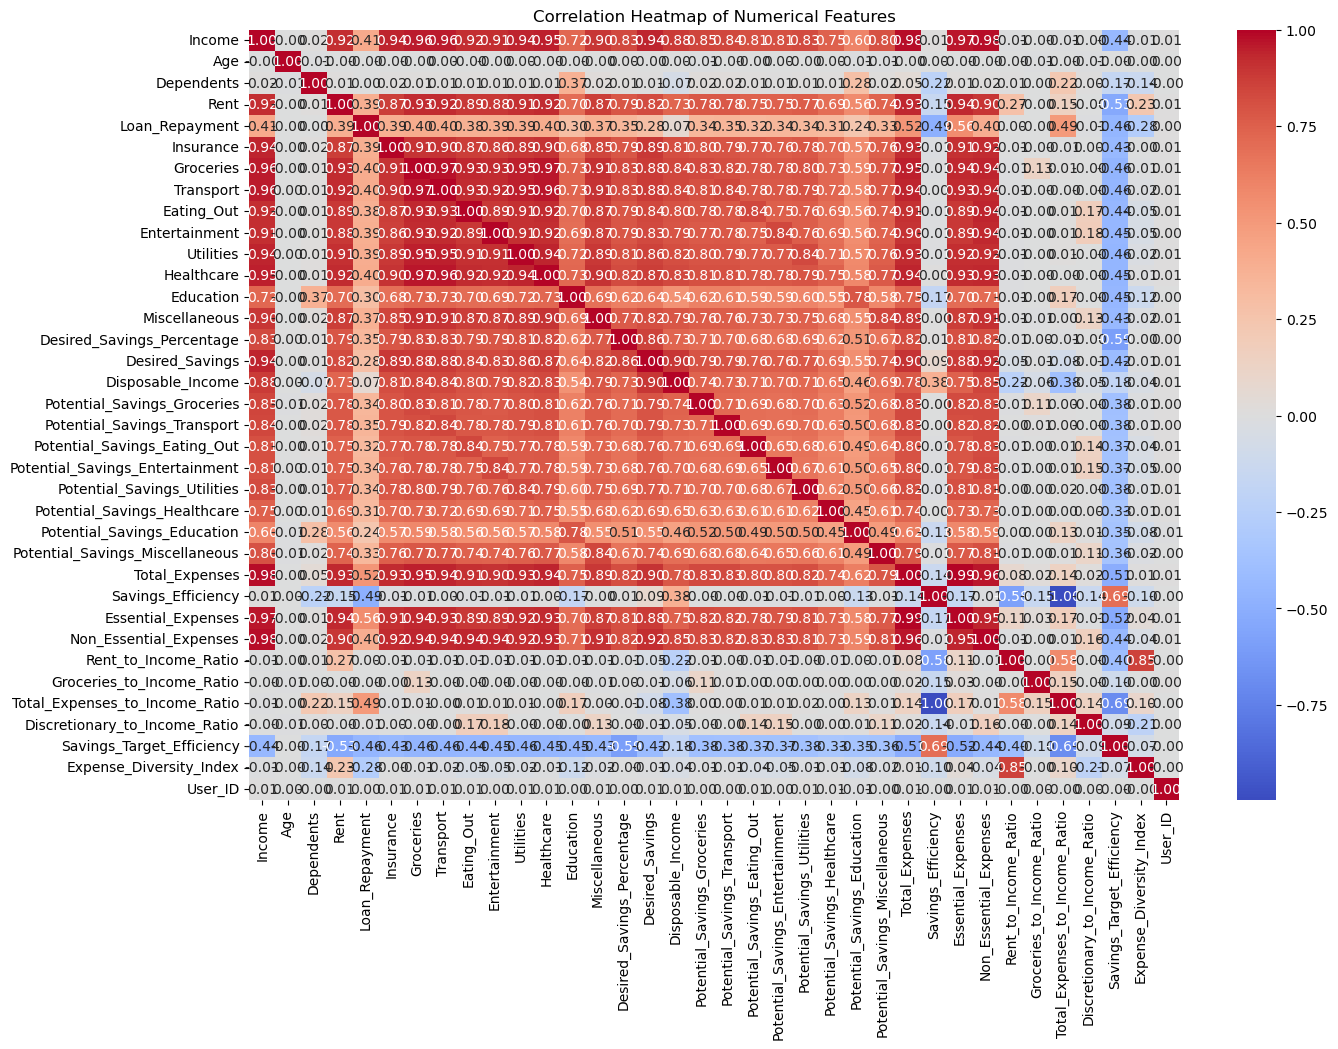

In [42]:
# Select only numerical columns for correlation calculation
numerical_data = df_cleaned.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
#Correlation Heatmap

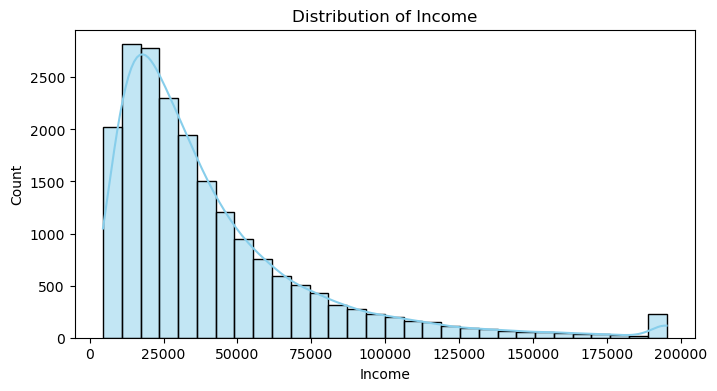

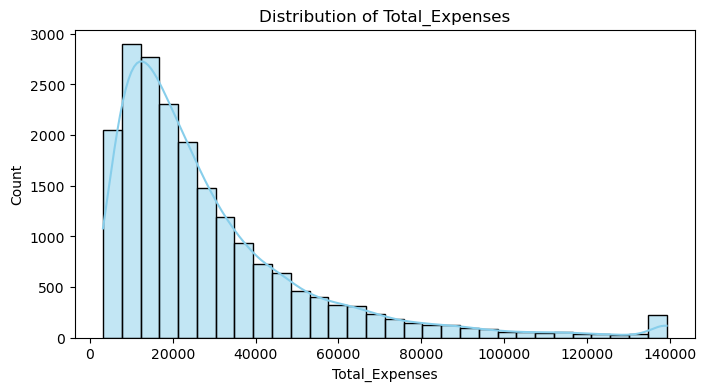

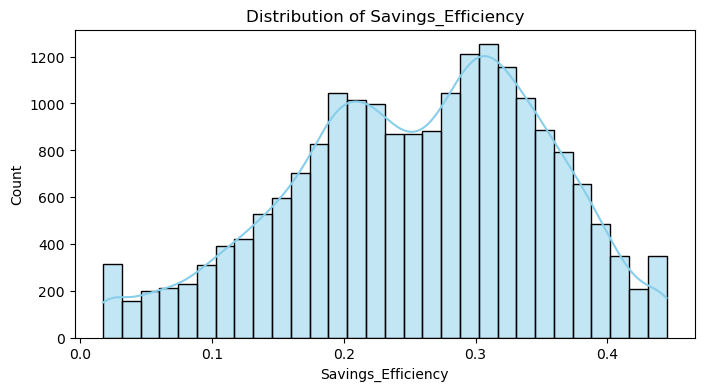

In [43]:
#Distribution Plots
numerical_features = ['Income', 'Total_Expenses', 'Savings_Efficiency']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df_cleaned, x=feature, kde=True, color="skyblue", bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

C:\Users\sneha\AppData\Local\Temp\ipykernel_11168\2009145162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Income_Tier', y='Income', palette='coolwarm')


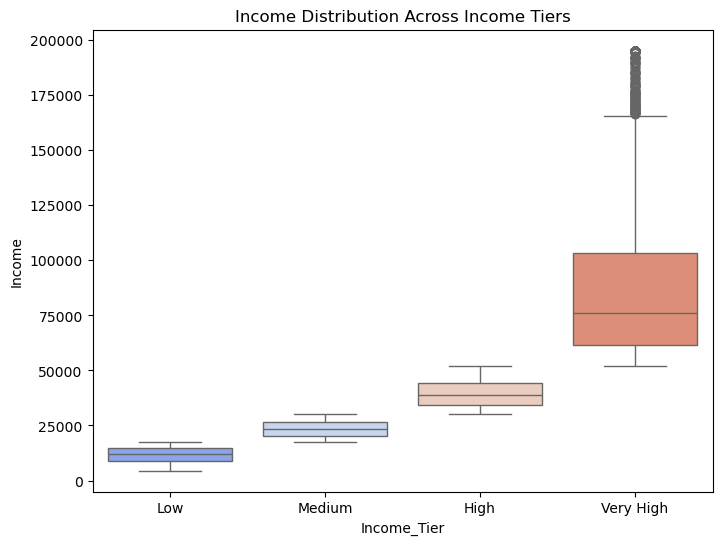

In [44]:
#Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='Income_Tier', y='Income', palette='coolwarm')
plt.title('Income Distribution Across Income Tiers')
plt.show()

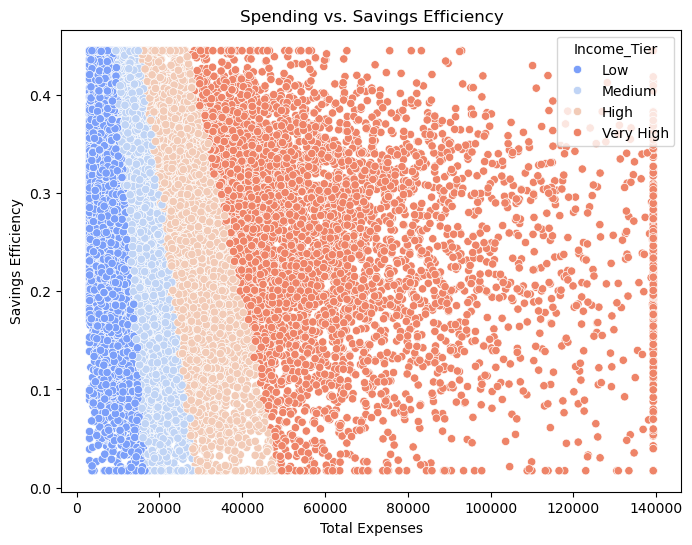

In [45]:
#Spending vs Savings
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='Total_Expenses', y='Savings_Efficiency', hue='Income_Tier', palette='coolwarm')
plt.title('Spending vs. Savings Efficiency')
plt.xlabel('Total Expenses')
plt.ylabel('Savings Efficiency')
plt.show()

C:\Users\sneha\AppData\Local\Temp\ipykernel_11168\1222617797.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Overspending_Flag', palette='coolwarm')


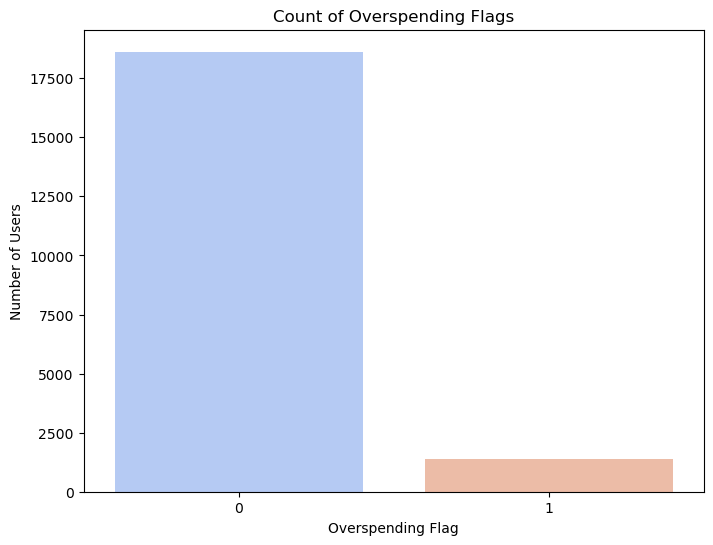

In [46]:
#Overspending Analysis
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='Overspending_Flag', palette='coolwarm')
plt.title('Count of Overspending Flags')
plt.xlabel('Overspending Flag')
plt.ylabel('Number of Users')
plt.show()

Correlation Heatmap: Revealed strong interrelationships among numerical financial features, highlighting areas of multicollinearity.

Histogram of Total Expenses: Showed most users' expenses clustering below ₹40,000, with fewer outliers in higher spending brackets.

Boxplot of Income by Tiers: Illustrated significant income disparity across tiers, with "Very High" having the widest range and highest median.

Scatter Plot of Spending vs Savings Efficiency: Demonstrated an inverse relationship, where higher savings efficiency often aligns with lower expenses.

Overspending Flag Bar Chart: Indicated that approximately 10% of users are flagged for overspending, signaling a minority group needing financial intervention.